Imports

In [1]:
import pandas as pd
import numpy as np

from model.network import KohonenNetwork
from model.distance import GaussianDistance, MexicanHatDistance

from tabulate import tabulate
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

Distances

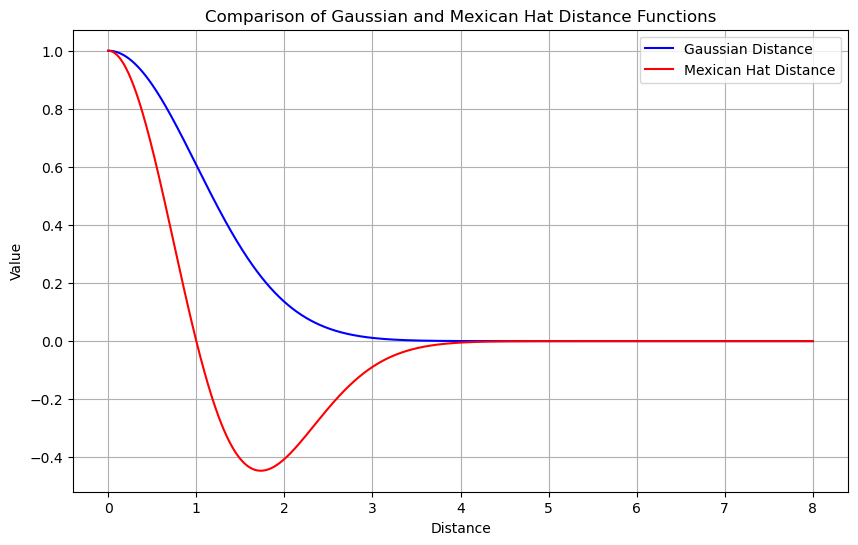

In [30]:
distances = np.linspace(0, 8, 800)
gaussian = GaussianDistance(1.0)
mexican_hat = MexicanHatDistance(1.0)

gaussian_values = [gaussian(d) for d in distances]
mexican_hat_values = [mexican_hat(d) for d in distances]

plt.figure(figsize=(10, 6))
plt.plot(distances, gaussian_values, label='Gaussian Distance', color='blue')
plt.plot(distances, mexican_hat_values, label='Mexican Hat Distance', color='red')
plt.title('Comparison of Gaussian and Mexican Hat Distance Functions')
plt.xlabel('Distance')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

Datasets

In [2]:
df_hex = pd.read_csv('./data/hexagon.csv')
df_cube = pd.read_csv('./data/cube.csv')
hex_x = df_hex[['x', 'y']].values
cube_x = df_cube[['x', 'y', 'z']].values
hex_y = df_hex['c'].values
cube_y = df_cube['c'].values

In [3]:
mnist = pd.read_csv('./data/mnist_train.csv')
mnist_x = mnist.drop(columns='label').to_numpy().astype('float64')[:2000]
mnist_y = mnist[['label']].to_numpy()[:2000]

harus_x = pd.read_csv('./data/X_train.txt', delim_whitespace=True, header=None).to_numpy()[:2000]
harus_y = pd.read_csv('./data/y_train.txt', sep=' ', header=None).to_numpy()[:2000] - 1

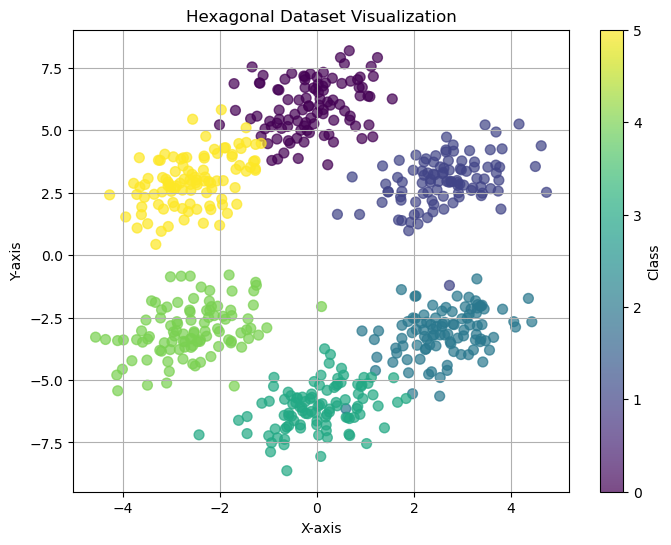

In [27]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(hex_x[:, 0], hex_x[:, 1], c=hex_y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Class')
plt.title('Hexagonal Dataset Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

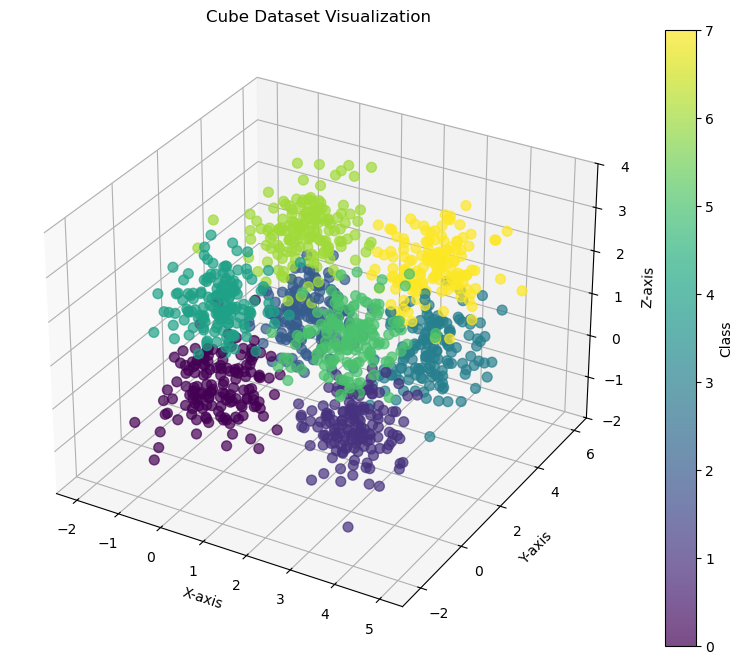

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cube_x[:, 0], cube_x[:, 1], cube_x[:, 2], c=cube_y, cmap='viridis', s=50, alpha=0.7)
ax.set_title('Cube Dataset Visualization')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
fig.colorbar(scatter, label='Class')
plt.show()

Test possible configurations.

In [ ]:
def test_kohonen(x, y, neighbourhood_scalers, width, height):
    distances = [GaussianDistance(1.0), MexicanHatDistance(1.0)]
    hex_nets = [True, False]
    results = []
    for distance in distances:
        for hex_net in hex_nets:
            for neighbourhood_scaler in neighbourhood_scalers:
                print(f"~~~~~ Testing with distance: {distance.__class__.__name__}, hexagonal: {hex_net}, "
                      f"neighbourhood_scaler: {neighbourhood_scaler}")
                koh = KohonenNetwork(width=width,
                                     height=height,
                                     input_dim=x.shape[1],
                                     hexagonal=hex_net,
                                     data=x)
                koh.train(data=x, epochs=10, neighbourhood_scaler=neighbourhood_scaler,
                          learning_rate=0.1, distance=distance)
                res = koh.metrics(data=x, labels=y)
                results.append({
                    'distance': distance,
                    'hexagonal': hex_net,
                    'neighbourhood_scaler': neighbourhood_scaler,
                    'silhouette_score': res['silhouette_score'],
                    'davies_bouldin_score': res['davies_bouldin_score'],
                })
    return pd.DataFrame(results)

In [ ]:
test_kohonen(
    x=mnist_x,
    y=mnist_y,
    neighbourhood_scalers=[0.1, 0.5, 1.0],
    width=14,
    height=14
).to_csv('./results/mnist.csv', index=False)

~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.001
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0191
Davies-Bouldin score: 2.2653
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.01
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0179
Davies-Bouldin score: 2.0086
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.1
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0452
Davies-Bouldin score: 1.8465
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbour

/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 8
***
Silhouette score: 0.0675
Davies-Bouldin score: 3.1600


In [18]:
test_kohonen(
    x=harus_x,
    y=harus_y,
    neighbourhood_scalers=[0.1, 0.5, 1.0],
    learning_rates=[0.001, 0.01, 0.1, 1],
    width=14,
    height=14
).to_csv('./results/harus.csv', index=False)

~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.001
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0206
Davies-Bouldin score: 2.2534
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.01
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0209
Davies-Bouldin score: 2.0550
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.1
Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0367
Davies-Bouldin score: 1.8494
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhoo

/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 10
***
Silhouette score: 0.1282
Davies-Bouldin score: 2.3598


In [33]:
test_kohonen(
    x=hex_x,
    y=hex_y,
    neighbourhood_scalers=[0.1, 0.5, 1.0],
    learning_rates=[0.001, 0.01, 0.1, 1],
    width=11,
    height=11
).to_csv('./results/hex.csv', index=False)

~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.001
Number of neurons in the Kohonen network: 121
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 121
***
Silhouette score: 0.1926
Davies-Bouldin score: 0.9017
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.01
Number of neurons in the Kohonen network: 121
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 121
***
Silhouette score: 0.1792
Davies-Bouldin score: 0.8965
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.1
Number of neurons in the Kohonen network: 121
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 121
***
Silhouette score: 0.2971
Davies-Bouldin score: 0.7908
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhoo

In [34]:
test_kohonen(
    x=cube_x,
    y=cube_y,
    neighbourhood_scalers=[0.1, 0.5, 1.0],
    learning_rates=[0.001, 0.01, 0.1, 1],
    width=13,
    height=13
).to_csv('./results/cube.csv', index=False)

~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.001
Number of neurons in the Kohonen network: 169
***
Number of classes in the data: 8
Number of classes predicted by the Kohonen network: 169
***
Silhouette score: 0.1219
Davies-Bouldin score: 1.1980
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.01
Number of neurons in the Kohonen network: 169
***
Number of classes in the data: 8
Number of classes predicted by the Kohonen network: 169
***
Silhouette score: 0.1652
Davies-Bouldin score: 1.0909
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhood_scaler: 0.1, learning_rate: 0.1
Number of neurons in the Kohonen network: 169
***
Number of classes in the data: 8
Number of classes predicted by the Kohonen network: 169
***
Silhouette score: 0.2276
Davies-Bouldin score: 0.9976
~~~~~ Testing with distance: GaussianDistance, hexagonal: True, neighbourhoo

In [22]:
hex_x.shape

(600, 2)

In [23]:
cube_x.shape

(1200, 3)

Evaluate 3 best configurations.

In [4]:

def evaluate_three_kohonen_networks(params1, params2, params3, width, height, data, epochs):
    results = {}

    for i, params in enumerate([params1, params2, params3], start=1):
        silhouette_scores = []
        db_scores = []
        
        print(f"~~~~~ Testing network {i} with params: {params}")

        for j in range(5):  
            print(f"Test No {j + 1}")
            koh = KohonenNetwork(
                width=width,
                height=height,
                input_dim=data.shape[1],
                hexagonal=params['hexagon'],
                data=data
            )
            koh.train(
                data=data,
                epochs=epochs,
                neighbourhood_scaler=params['ns'],
                learning_rate=params['lr'],
                distance=params['distance']
            )
            predicted_labels = koh.predict_labels(data)
            if len(np.unique(predicted_labels)) > 1:
                silhouette_scores.append(silhouette_score(data, predicted_labels))
                db_scores.append(davies_bouldin_score(data, predicted_labels))
            else:
                print("Only one unique label predicted, skipping this lap.")

        results[f'network_{i}'] = {
            'silhouette_mean': np.mean(silhouette_scores),
            'silhouette_std': np.std(silhouette_scores),
            'db_mean': np.mean(db_scores),
            'db_std': np.std(db_scores)
        }

    return results

Evaluation for Hexagon Dataset.

In [37]:
params_hex_1 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 1.0
}

params_hex_2 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 0.1
}

params_hex_3 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': True,
    'ns': 1.0,
    'lr': 1.0
}

res_hex = evaluate_three_kohonen_networks(
    params_hex_1,
    params_hex_2,
    params_hex_3,
    width=11,
    height=11,
    data=hex_x,
    epochs=30
)

~~~~~ Testing network 1 with params: {'distance': <model.distance.MexicanHatDistance object at 0x131975b70>, 'hexagon': False, 'ns': 1.0, 'lr': 1.0}
Test No 1
Test No 2


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Test No 3


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Test No 4


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Test No 5


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


~~~~~ Testing network 2 with params: {'distance': <model.distance.MexicanHatDistance object at 0x16b5707a0>, 'hexagon': False, 'ns': 1.0, 'lr': 0.1}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5
~~~~~ Testing network 3 with params: {'distance': <model.distance.MexicanHatDistance object at 0x16b54d310>, 'hexagon': True, 'ns': 1.0, 'lr': 1.0}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5


In [38]:
pd.DataFrame(res_hex)

network_1  network_2  network_3
silhouette_mean   0.551479   0.540359   0.392944
silhouette_std    0.024318   0.022797   0.008810
db_mean           0.650420   0.687325   0.903673
db_std            0.069702   0.055682   0.014647

Evaluation for Cube dataset.

In [42]:
params_cube_1 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 1.0
}

params_cube_2 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 0.1
}

params_cube_3 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': True,
    'ns': 1.0,
    'lr': 1.0
}

res_cube = evaluate_three_kohonen_networks(
    params_cube_1,
    params_cube_2,
    params_cube_3,
    width=13,
    height=13,
    data=cube_x,
    epochs=30
)
pd.DataFrame(res_cube)

~~~~~ Testing network 1 with params: {'distance': <model.distance.MexicanHatDistance object at 0x16b0bbcd0>, 'hexagon': False, 'ns': 1.0, 'lr': 1.0}
Test No 1


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: overflow encountered in add
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: invalid value encountered in multiply
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])


Only one unique label predicted, skipping this lap.
Test No 2
Only one unique label predicted, skipping this lap.
Test No 3
Test No 4


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: overflow encountered in add
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: invalid value encountered in multiply
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])


Only one unique label predicted, skipping this lap.
Test No 5
Only one unique label predicted, skipping this lap.
~~~~~ Testing network 2 with params: {'distance': <model.distance.MexicanHatDistance object at 0x16b0bbbd0>, 'hexagon': False, 'ns': 1.0, 'lr': 0.1}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5
~~~~~ Testing network 3 with params: {'distance': <model.distance.MexicanHatDistance object at 0x131ac1630>, 'hexagon': True, 'ns': 1.0, 'lr': 1.0}
Test No 1


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Test No 2


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Test No 3
Test No 4
Test No 5


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2781: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2780: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


network_1  network_2  network_3
silhouette_mean   0.345736   0.358716   0.252822
silhouette_std    0.000000   0.028115   0.013081
db_mean           1.170904   1.147707   1.393770
db_std            0.000000   0.096732   0.052469

In [45]:
params_mnist_1 = {
    'distance': GaussianDistance(1.0),
    'hexagon': True,
    'ns': 1.0,
    'lr': 1.0
}

params_mnist_2 = {
    'distance': GaussianDistance(1.0),
    'hexagon': False,
    'ns': 0.1,
    'lr': 1.0
}

params_mnist_3 = {
    'distance': GaussianDistance(1.0),
    'hexagon': False,
    'ns': 0.5,
    'lr': 1.0
}

res_mnist = evaluate_three_kohonen_networks(
    params_mnist_1,
    params_mnist_2,
    params_mnist_3,
    width=14,
    height=14,
    data=mnist_x,
    epochs=30
)
pd.DataFrame(res_mnist)

~~~~~ Testing network 1 with params: {'distance': <model.distance.GaussianDistance object at 0x16afe2db0>, 'hexagon': True, 'ns': 1.0, 'lr': 1.0}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5
~~~~~ Testing network 2 with params: {'distance': <model.distance.GaussianDistance object at 0x16afe2e60>, 'hexagon': False, 'ns': 0.1, 'lr': 1.0}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5
~~~~~ Testing network 3 with params: {'distance': <model.distance.GaussianDistance object at 0x1686e9d10>, 'hexagon': False, 'ns': 0.5, 'lr': 1.0}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5


network_1  network_2  network_3
silhouette_mean   0.074352   0.070113   0.070877
silhouette_std    0.001344   0.002306   0.001704
db_mean           1.966562   1.811799   1.891131
db_std            0.018309   0.036991   0.019903

In [5]:
params_harus_1 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 1.0
}

params_harus_2 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': False,
    'ns': 1.0,
    'lr': 0.1
}

params_harus_3 = {
    'distance': MexicanHatDistance(1.0),
    'hexagon': True,
    'ns': 0.5,
    'lr': 1.0
}

res_harus = evaluate_three_kohonen_networks(
    params_harus_1,
    params_harus_2,
    params_harus_3,
    width=14,
    height=14,
    data=harus_x,
    epochs=30
)
pd.DataFrame(res_harus)


~~~~~ Testing network 1 with params: {'distance': <model.distance.MexicanHatDistance object at 0x14d46a450>, 'hexagon': False, 'ns': 1.0, 'lr': 1.0}
Test No 1


/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: overflow encountered in add
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])
/Users/gasparsekula/Uni/sem6/mio/SelfOrganizingMaps/model/network.py:131: RuntimeWarning: invalid value encountered in multiply
  self.weights[i, j] += lr * neighbourhood_values[i, j] * (sample - self.weights[i, j])


Only one unique label predicted, skipping this lap.
Test No 2
Only one unique label predicted, skipping this lap.
Test No 3
Only one unique label predicted, skipping this lap.
Test No 4
Only one unique label predicted, skipping this lap.
Test No 5
Only one unique label predicted, skipping this lap.
~~~~~ Testing network 2 with params: {'distance': <model.distance.MexicanHatDistance object at 0x14d46b500>, 'hexagon': False, 'ns': 1.0, 'lr': 0.1}
Test No 1


/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Test No 2
Test No 3
Test No 4
Test No 5
~~~~~ Testing network 3 with params: {'distance': <model.distance.MexicanHatDistance object at 0x14d468aa0>, 'hexagon': True, 'ns': 0.5, 'lr': 1.0}
Test No 1
Test No 2
Test No 3
Test No 4
Test No 5


network_1  network_2  network_3
silhouette_mean        NaN   0.124770   0.093495
silhouette_std         NaN   0.008669   0.004328
db_mean                NaN   2.234630   2.142077
db_std                 NaN   0.072055   0.032403

Visualizations

Hexagon

/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/gasparsekula/anaconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


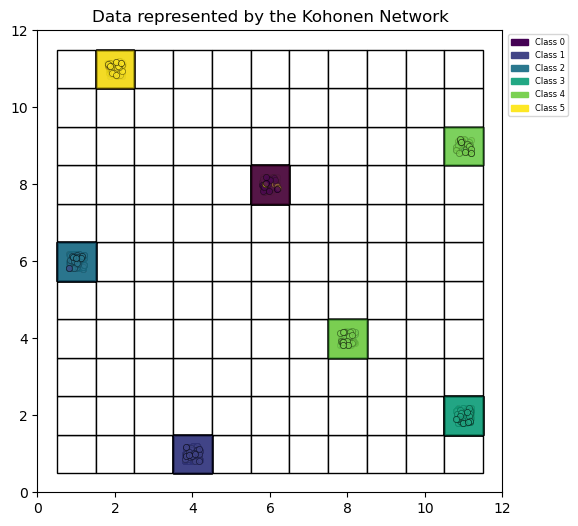

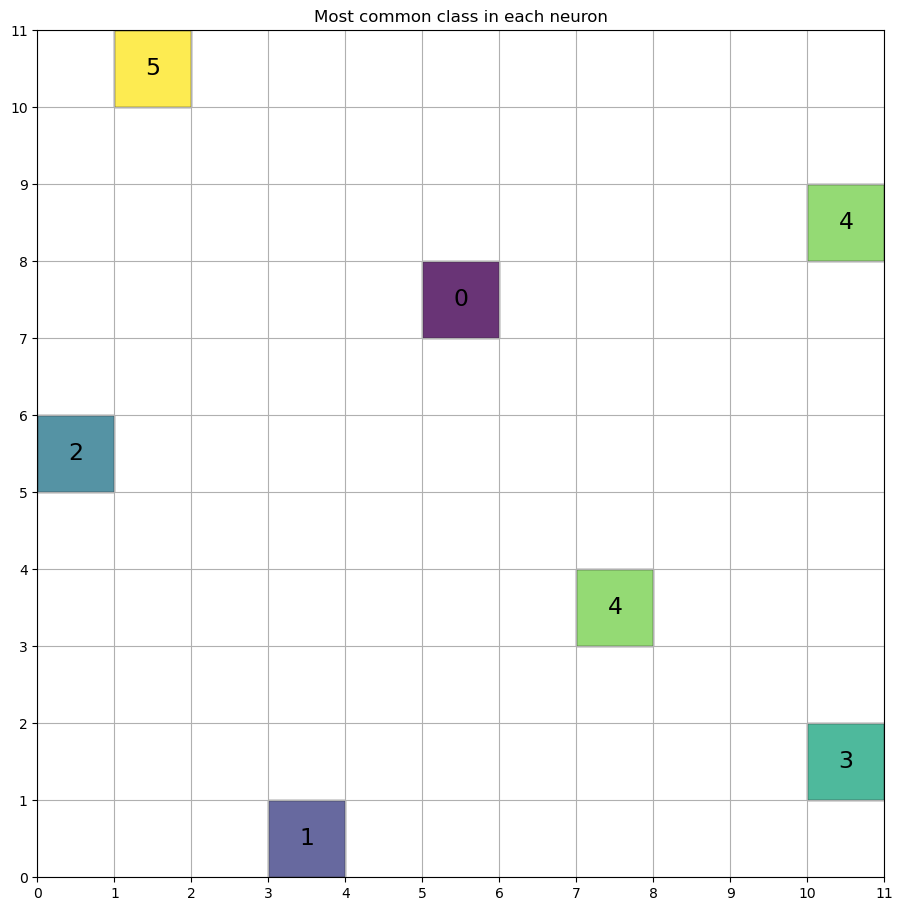

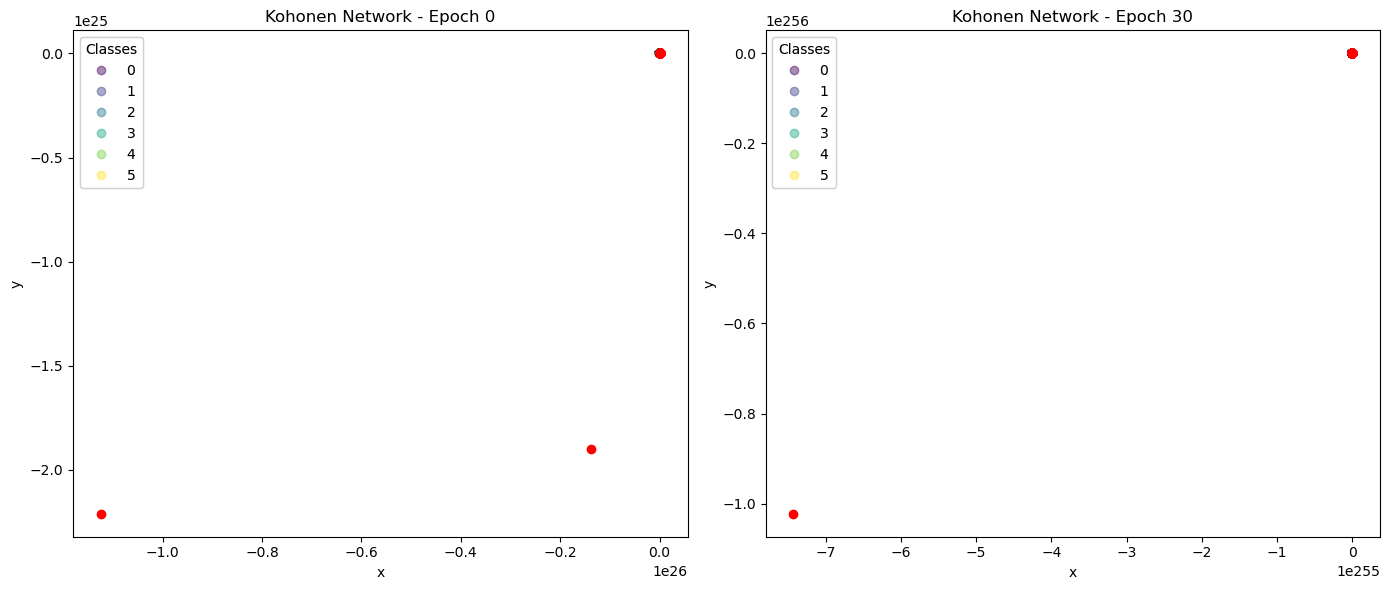

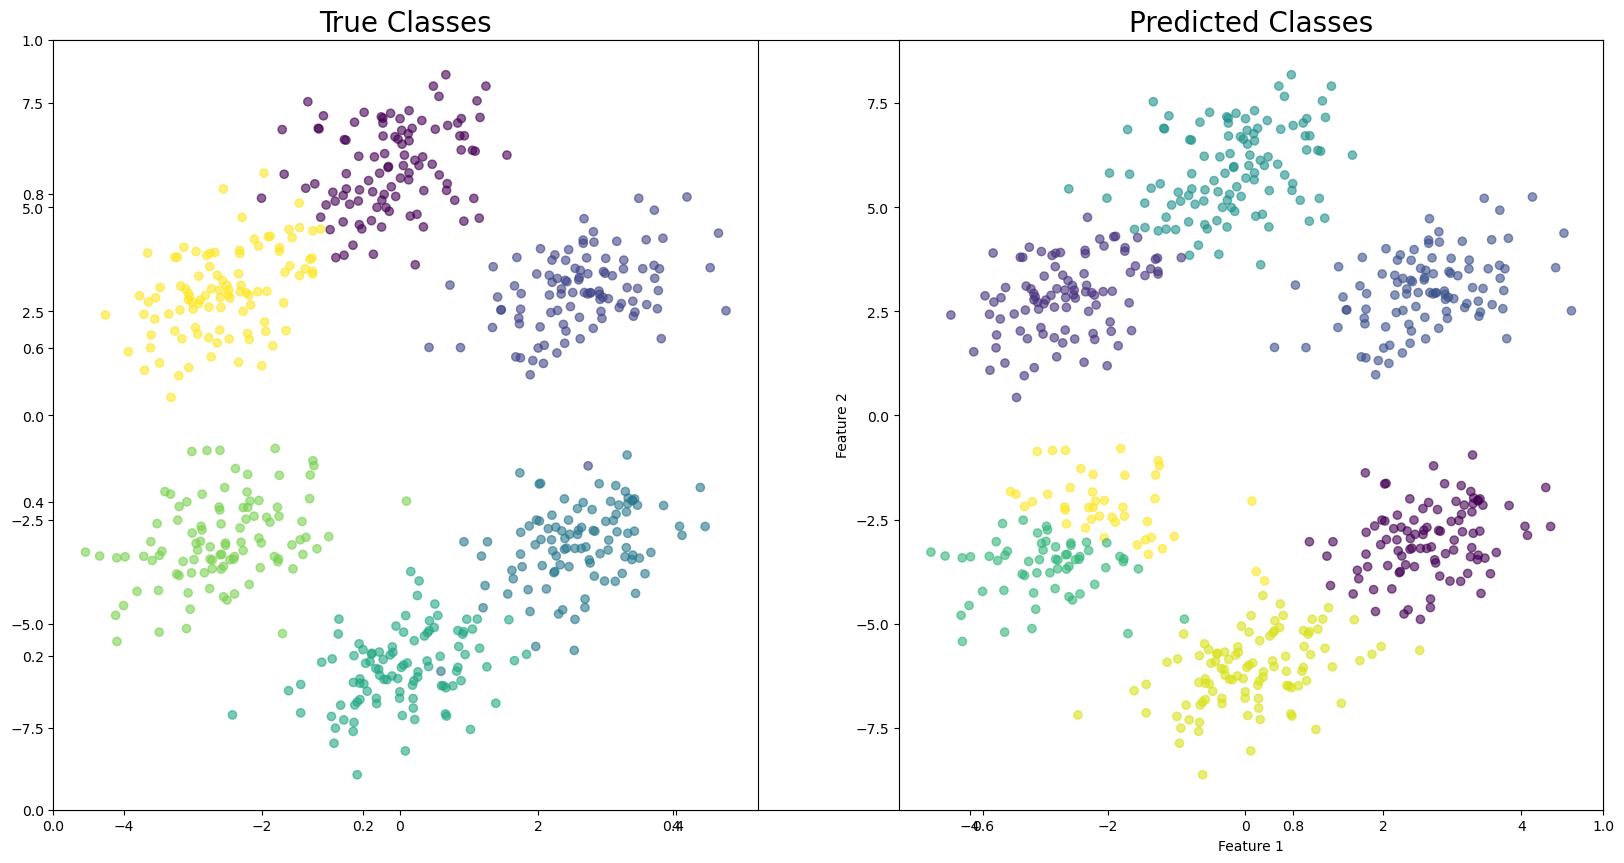

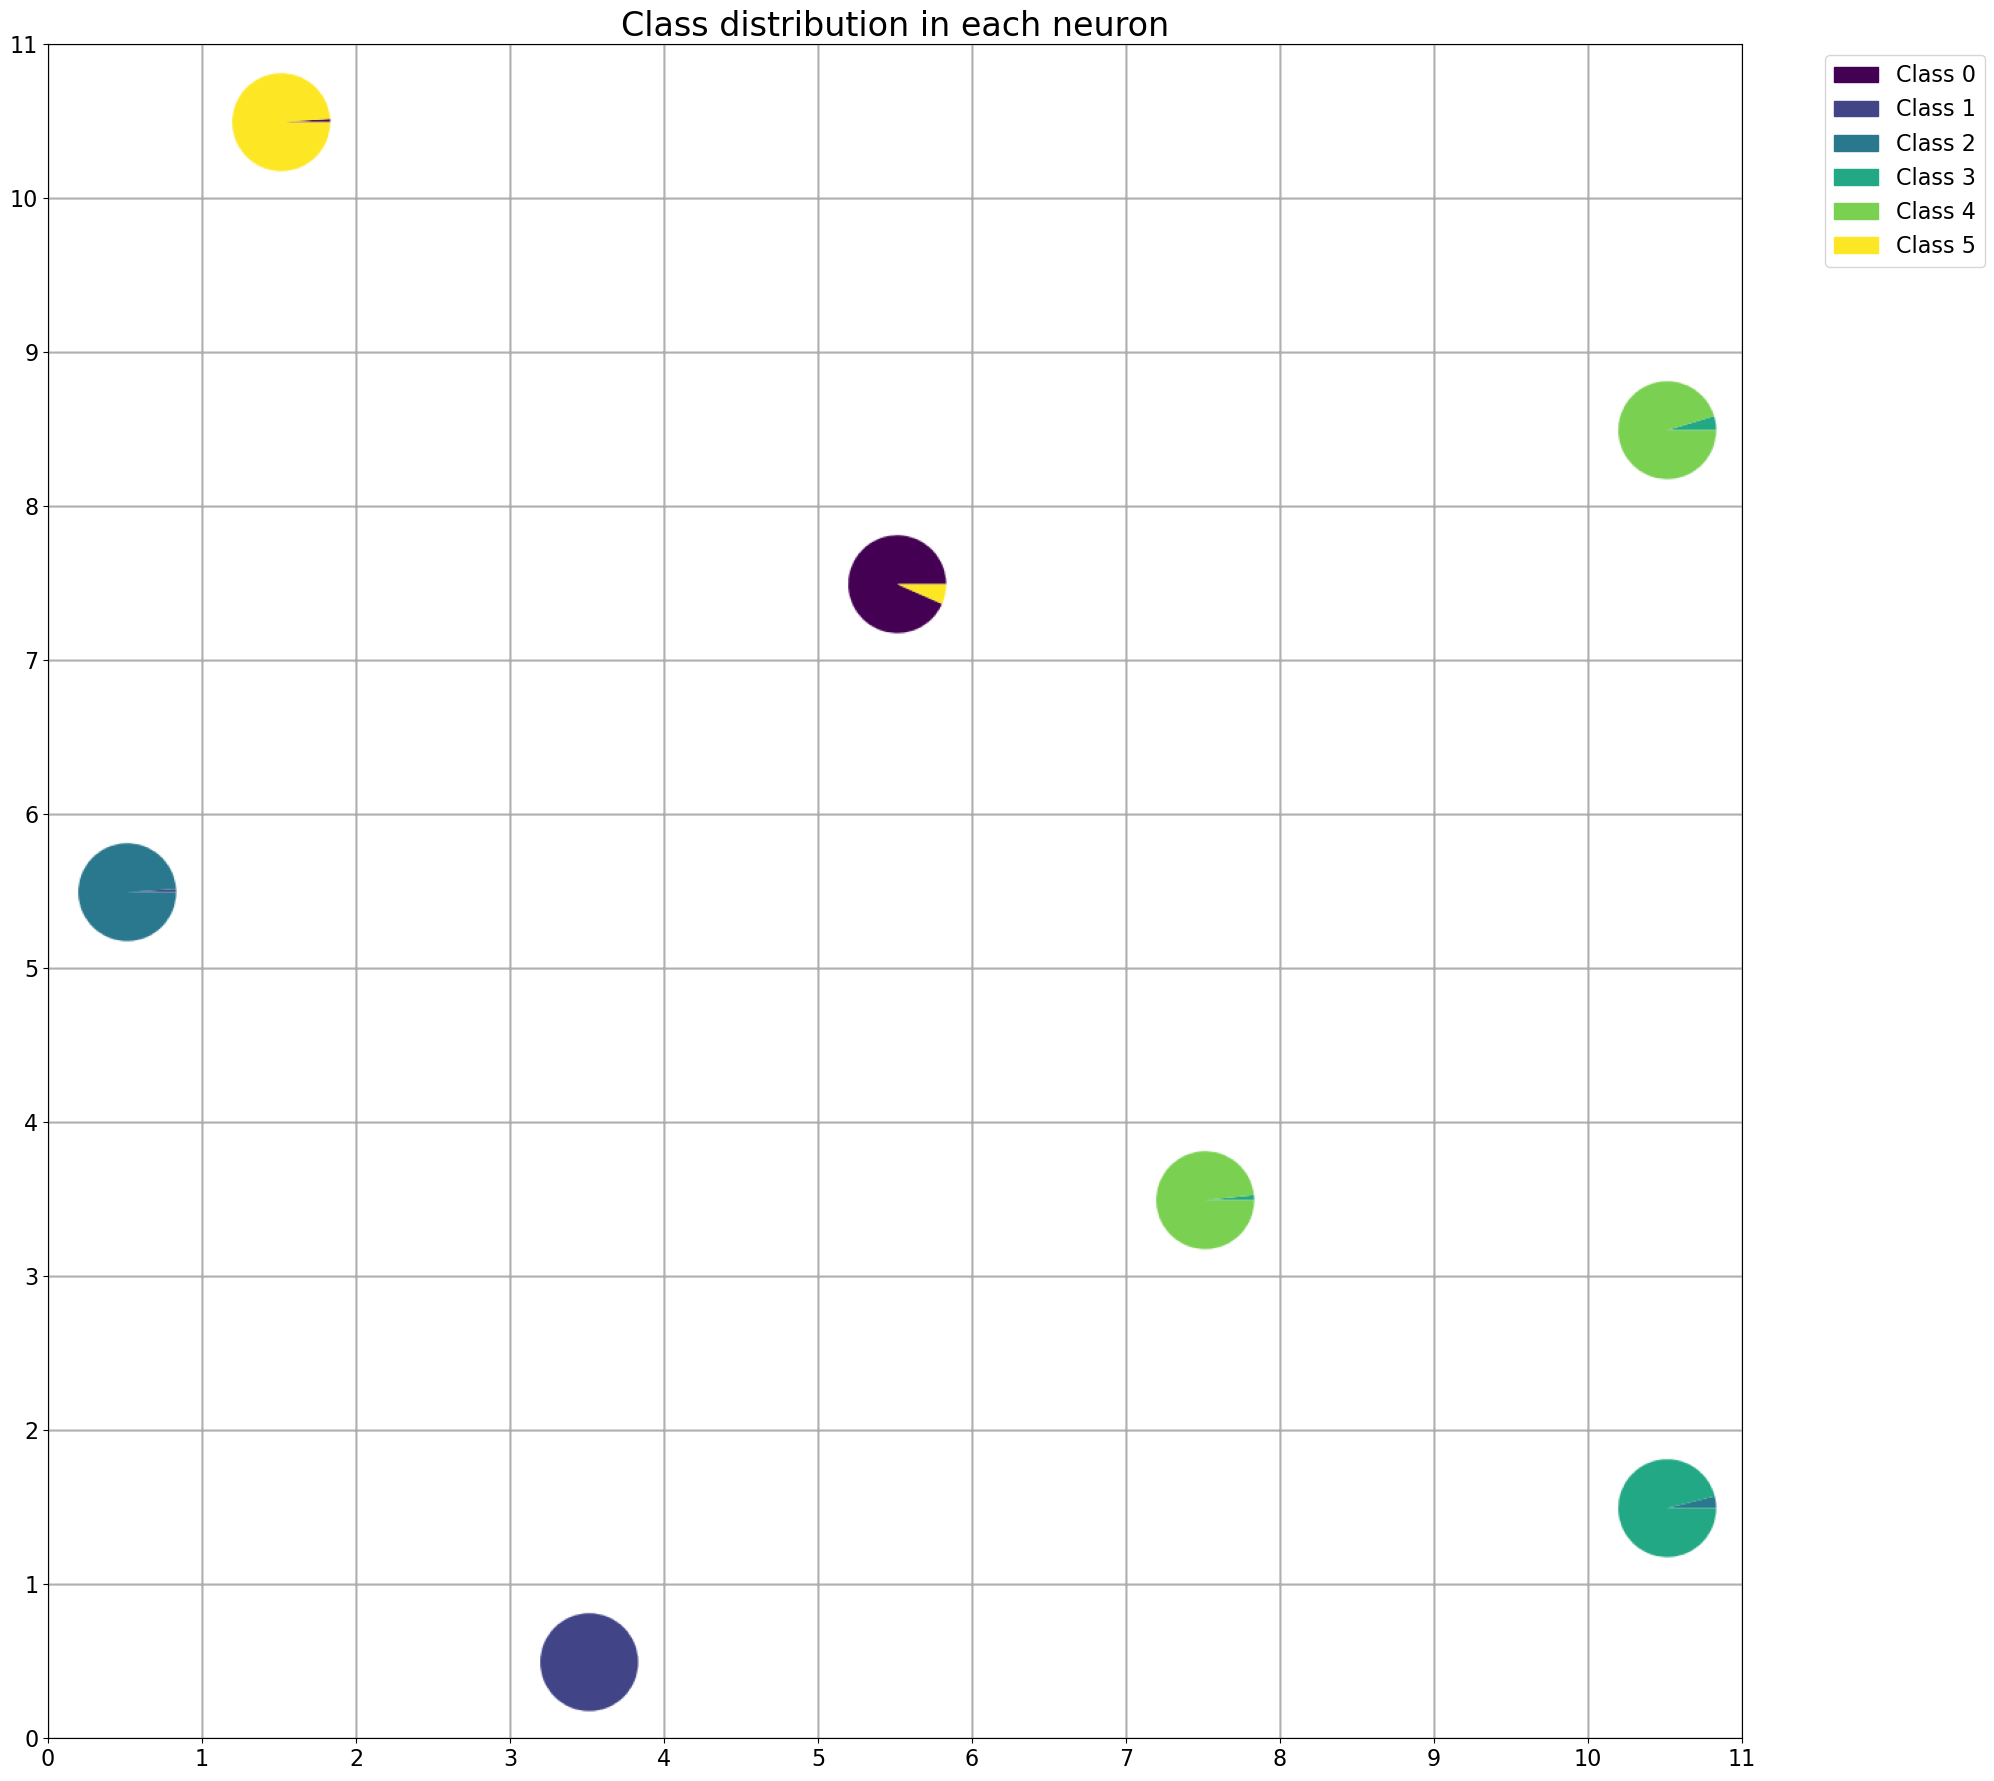

Number of neurons in the Kohonen network: 121
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 7
***
Silhouette score: 0.5544
Davies-Bouldin score: 0.6738


{'num_classes': 6,
 'num_classes_pred': 7,
 'silhouette_score': 0.5543745130364877,
 'davies_bouldin_score': 0.6738092743647288}

In [4]:
koh = KohonenNetwork(width=11, height=11, input_dim=2, hexagonal=False, data=hex_x)
koh.train(data=hex_x, epochs=30, neighbourhood_scaler=1.0, learning_rate=1.0, distance=MexicanHatDistance(1.0))
koh.plot_map(hex_x, hex_y)
koh.plot_neurons_class_labels(hex_x, hex_y)
koh.plot_kohonen_grid_progress(hex_x, hex_y)
koh.plot_clusters(hex_x, hex_y)
koh.plot_neurons_class_piecharts(hex_x, hex_y)
koh.metrics(data=hex_x, labels=hex_y)

Cube

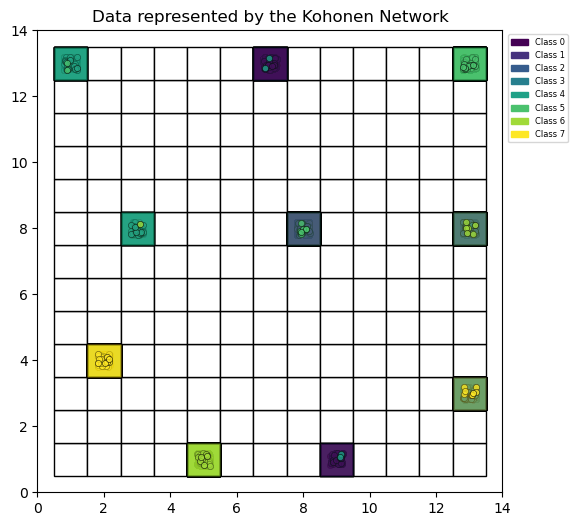

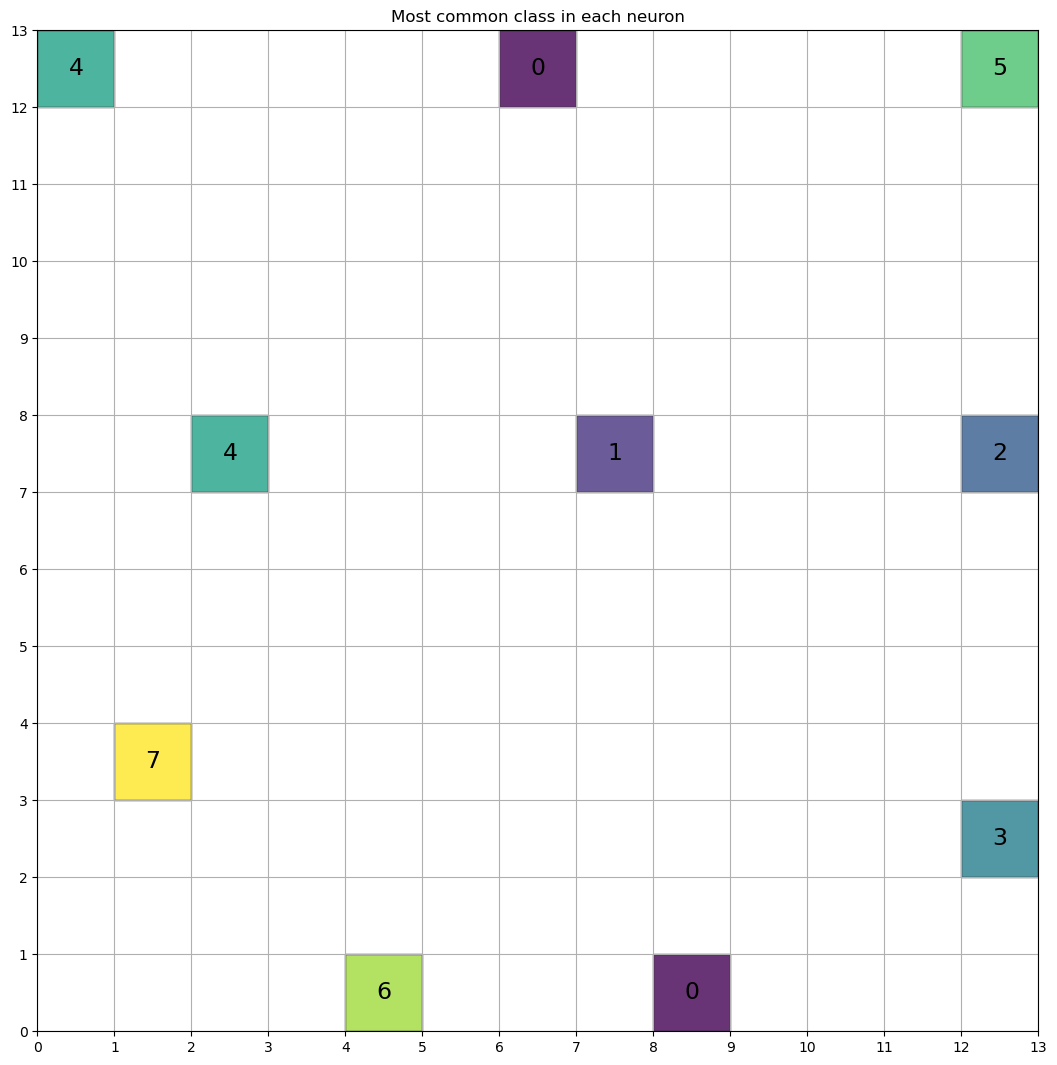

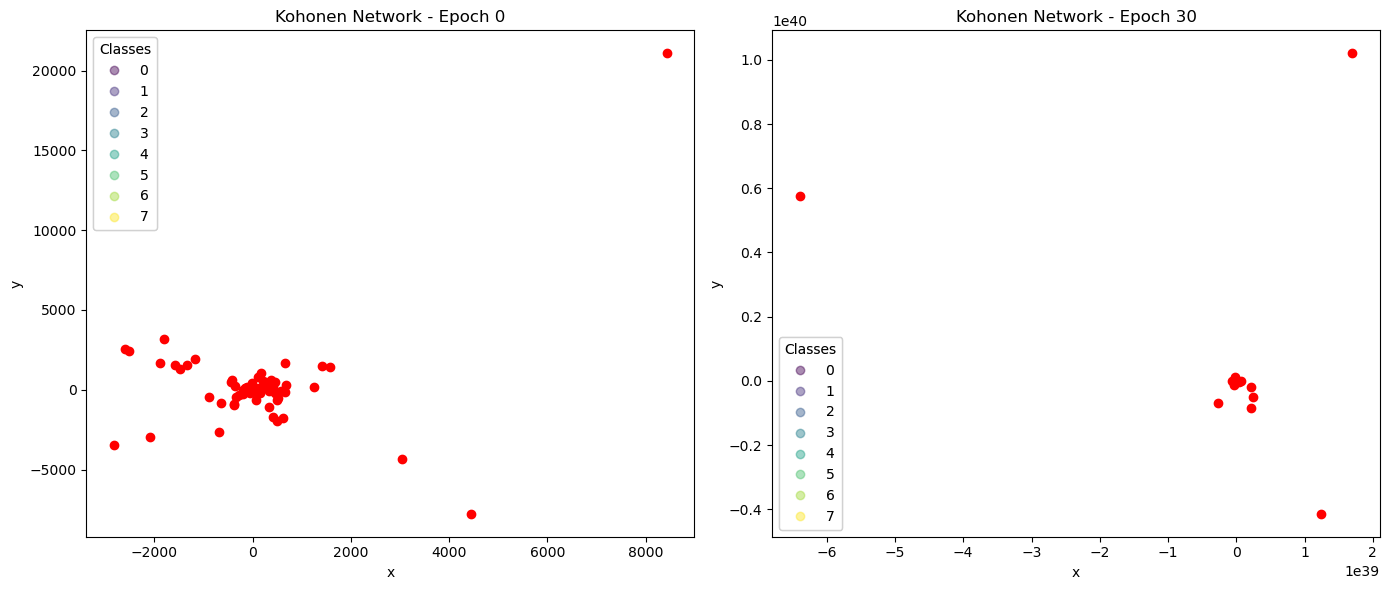

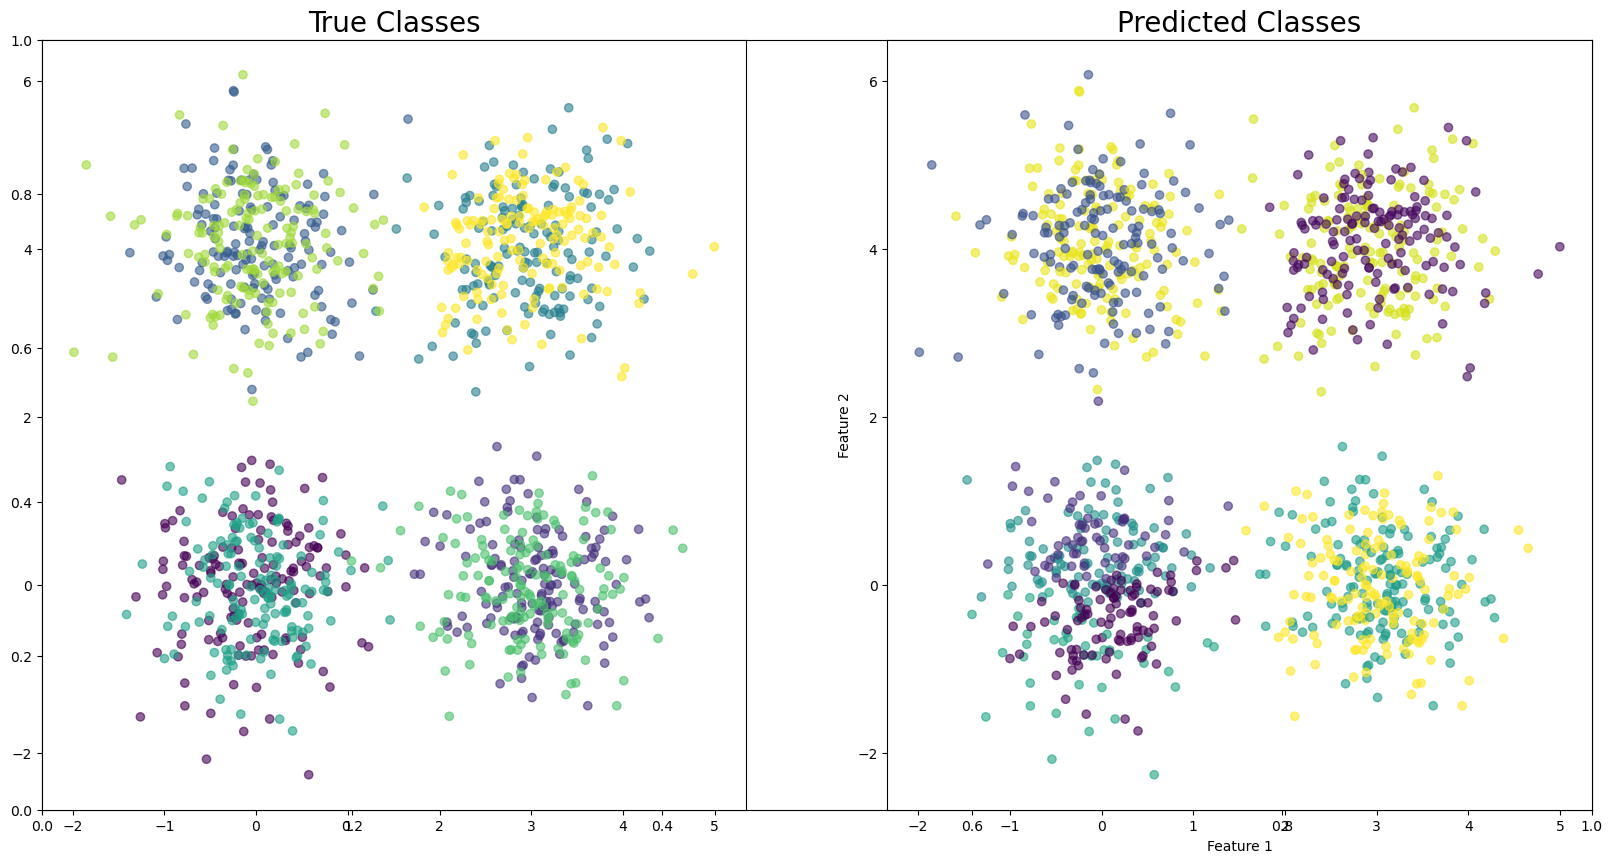

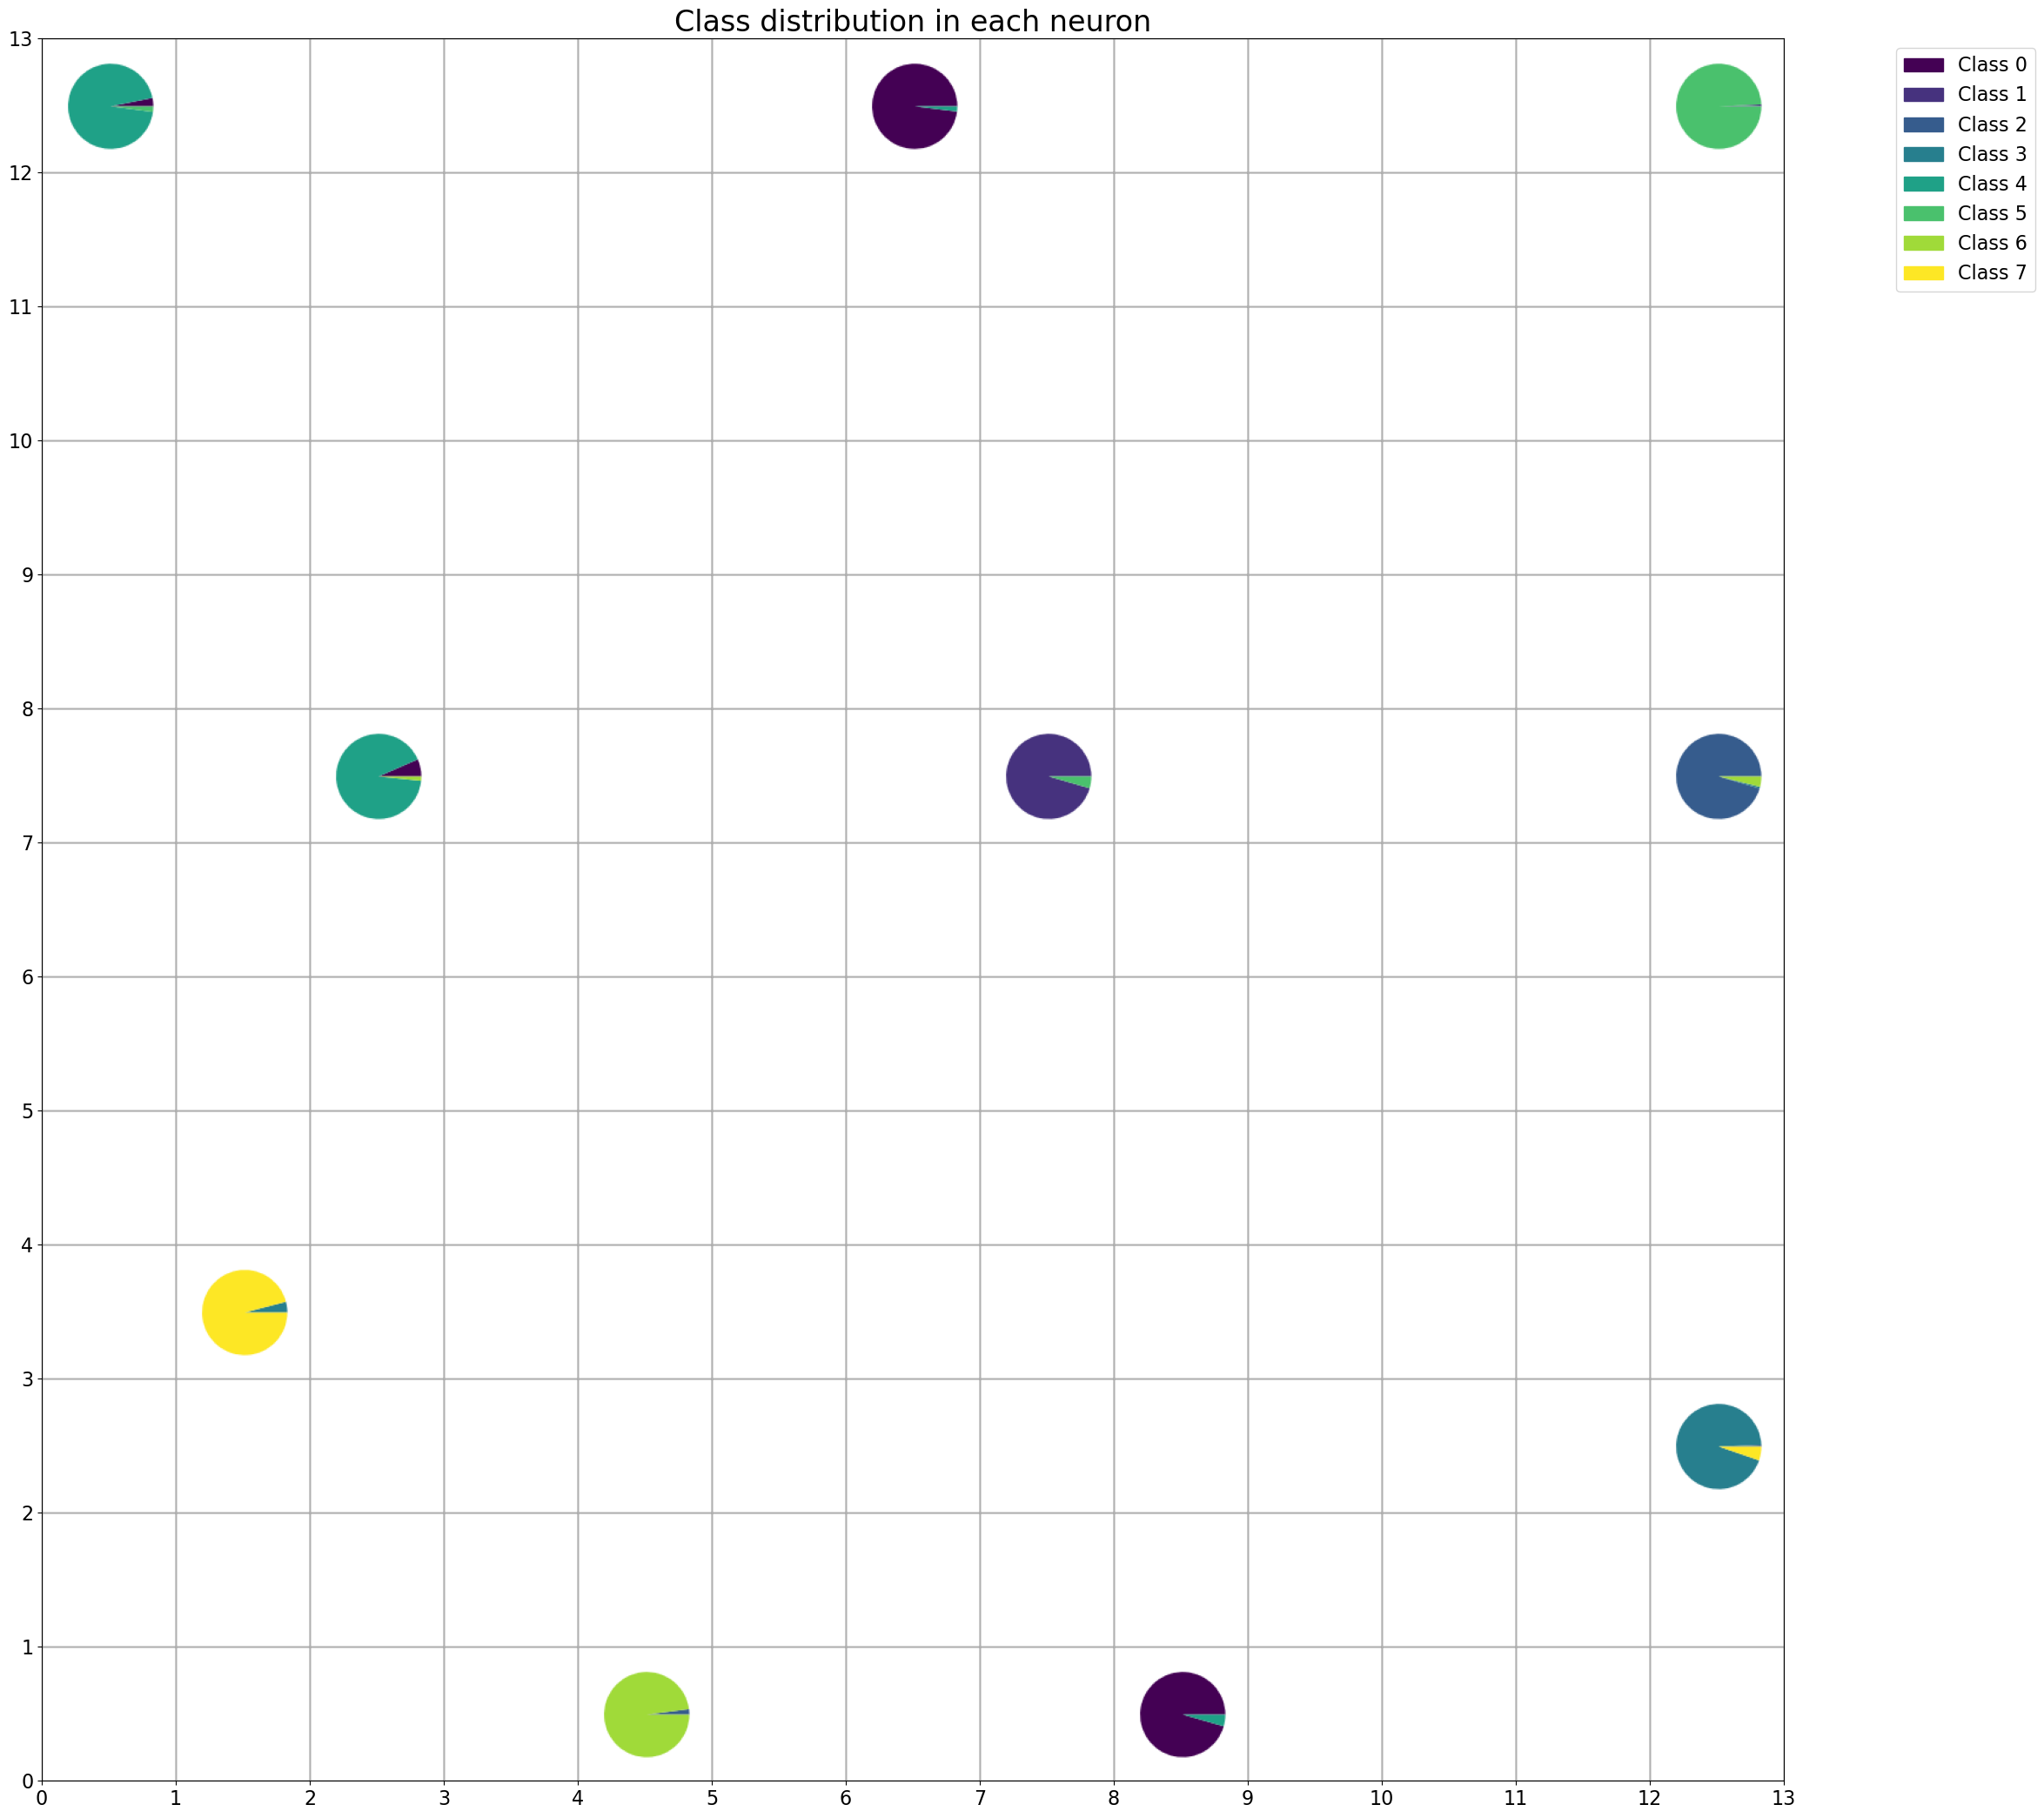

Number of neurons in the Kohonen network: 169
***
Number of classes in the data: 8
Number of classes predicted by the Kohonen network: 10
***
Silhouette score: 0.3833
Davies-Bouldin score: 1.0829


{'num_classes': 8,
 'num_classes_pred': 10,
 'silhouette_score': 0.3832524110694308,
 'davies_bouldin_score': 1.0828962648028482}

In [5]:
koh = KohonenNetwork(
    width=13,
    height=13,
    input_dim=3,
    hexagonal=False,
    data=cube_x
)
koh.train(
    data=cube_x,
    epochs=30,
    neighbourhood_scaler=1.0,
    learning_rate=0.1,
    distance=MexicanHatDistance(1.0)
)
koh.plot_map(cube_x, cube_y)
koh.plot_neurons_class_labels(cube_x, cube_y)
koh.plot_kohonen_grid_progress(cube_x, cube_y)
koh.plot_clusters(cube_x, cube_y)
koh.plot_neurons_class_piecharts(cube_x, cube_y)
koh.metrics(data=cube_x, labels=cube_y)


MNIST

In [6]:
def plot_cluster_diffs(labels: np.ndarray, tsne_res: np.ndarray, y: np.ndarray):
    unique_labels = np.unique(labels)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].scatter(tsne_res[:, 0], tsne_res[:, 1], c=y.flatten(), cmap='viridis', alpha=0.7)
    axes[0].set_title('True classes on TSNE', fontsize=20)
    label_indices = np.array([np.where(unique_labels == l)[0][0] for l in labels.flatten()])
    sc = axes[1].scatter(tsne_res[:, 0], tsne_res[:, 1], c=label_indices, cmap='gist_ncar', alpha=0.7)
    axes[1].set_title('Kohonen Network classes on TSNE', fontsize=20)
    plt.tight_layout()
    axes[0].set_xlabel('t-SNE Component 1', fontsize=15)
    axes[0].set_ylabel('t-SNE Component 2', fontsize=15)
    axes[1].set_xlabel('t-SNE Component 1', fontsize=15)
    plt.show()


In [12]:
tsne = TSNE(n_components=2, random_state=2025)
tsne_res = tsne.fit_transform(mnist_x)

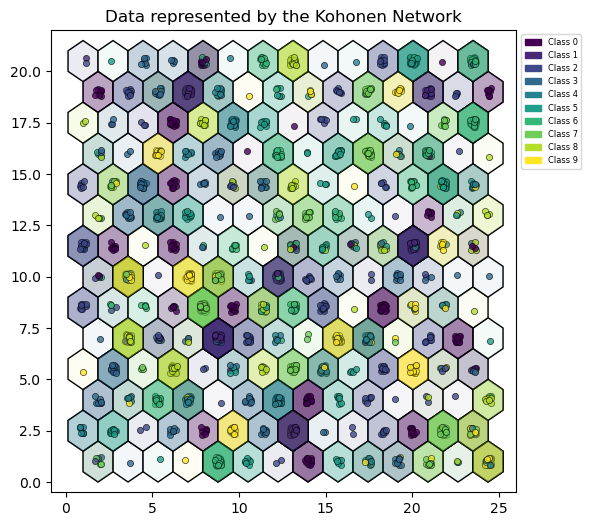

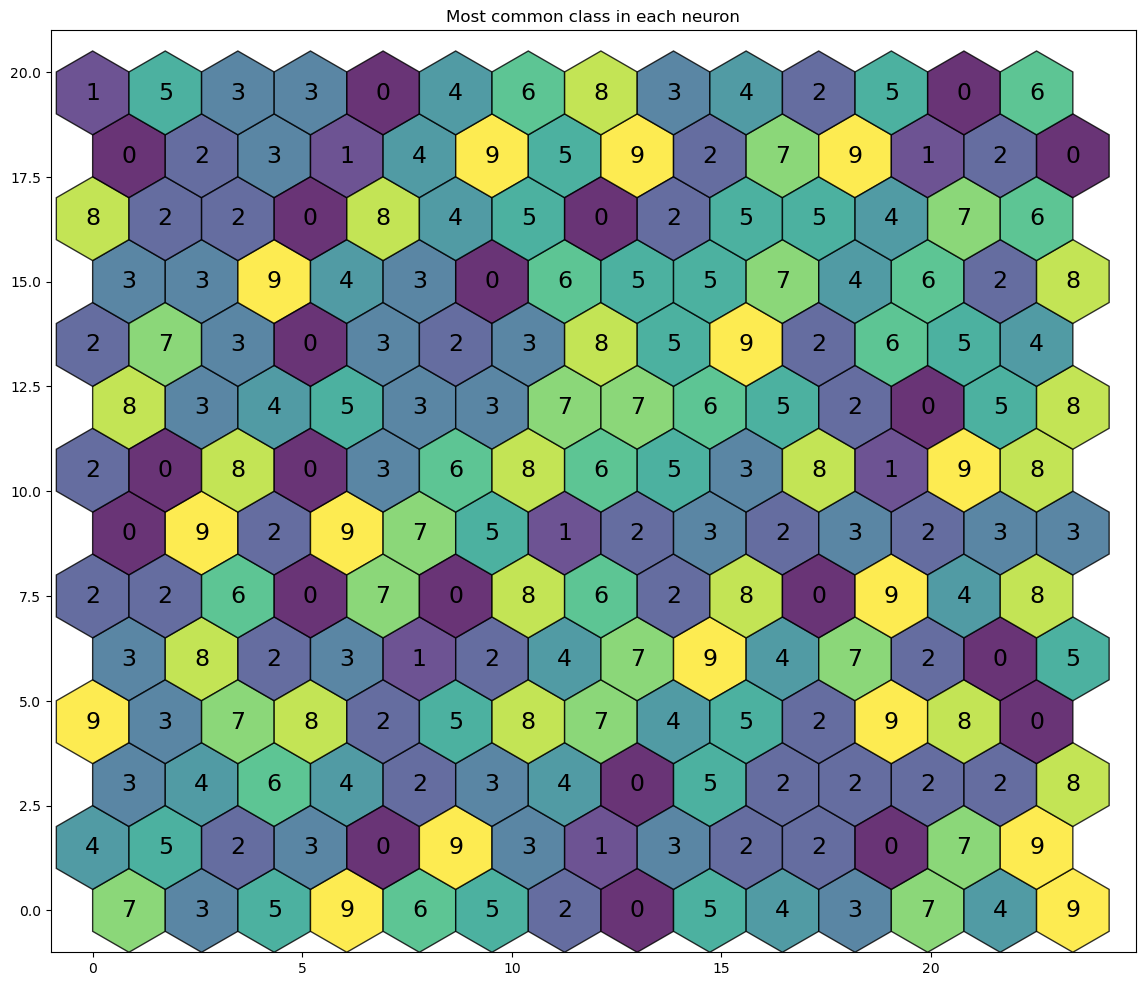

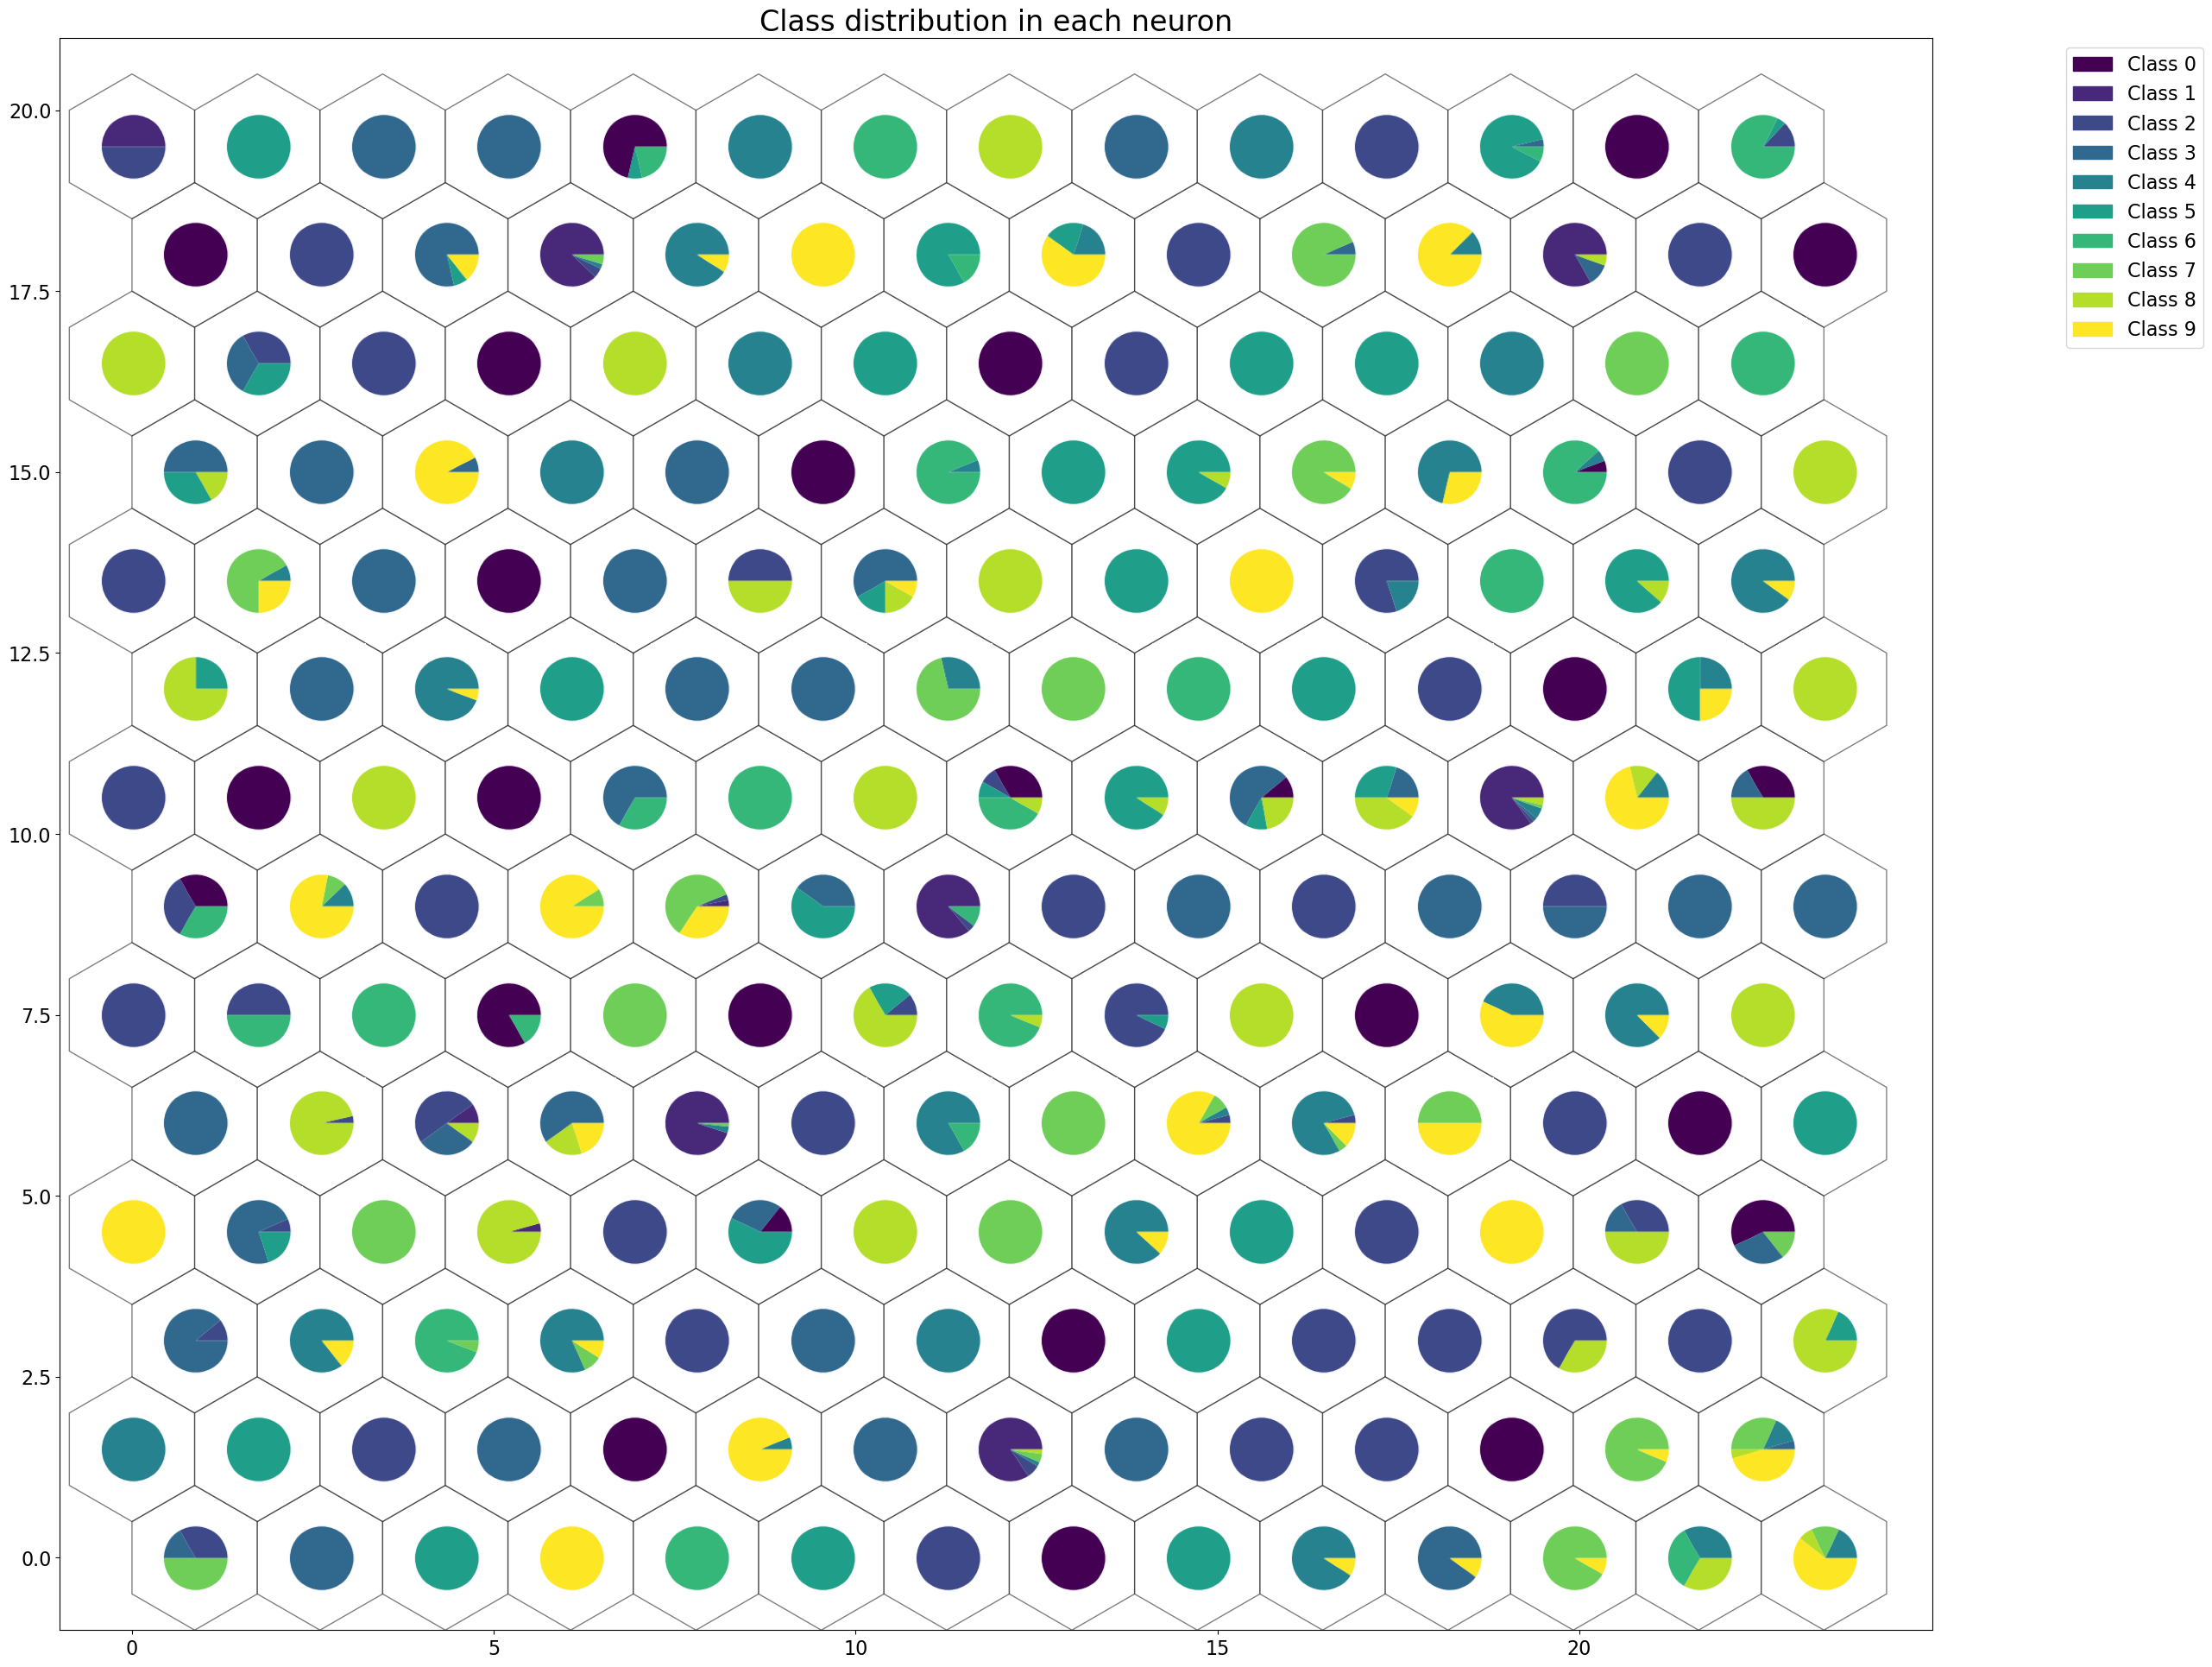

Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 10
Number of classes predicted by the Kohonen network: 196
***
Silhouette score: 0.0741
Davies-Bouldin score: 1.8305


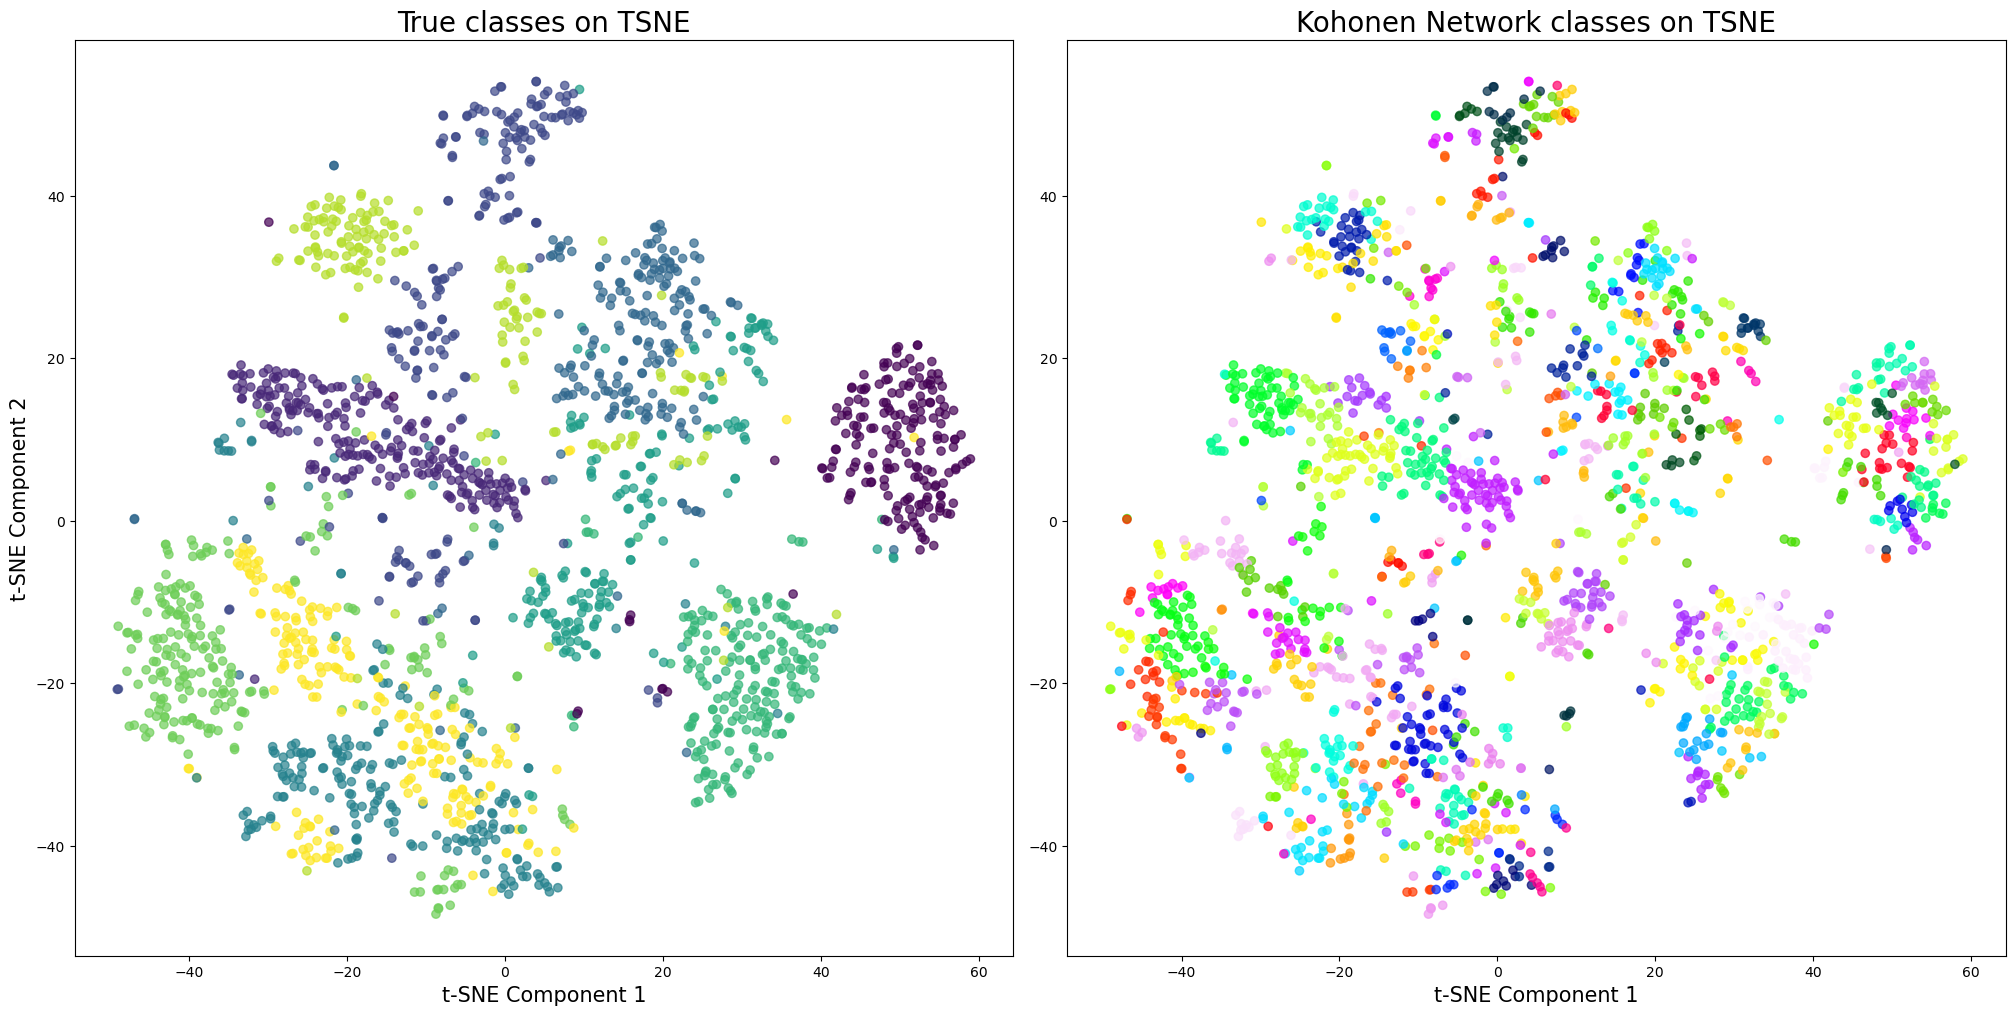

In [13]:
koh_1 = KohonenNetwork(width=14, height=14, input_dim=784, hexagonal=True, data=mnist_x)
koh_1.train(data=mnist_x, epochs=1000, neighbourhood_scaler=1, learning_rate=1.0, distance = GaussianDistance(1.0))
koh_1.plot_map(data=mnist_x, classes=mnist_y)
koh_1.plot_neurons_class_labels(data=mnist_x, classes=mnist_y)
koh_1.plot_neurons_class_piecharts(data=mnist_x, classes=mnist_y)
res_1 = koh_1.metrics(data=mnist_x, labels=mnist_y)
plot_cluster_diffs(koh_1.predict_labels(data=mnist_x), tsne_res, mnist_y)

HARUS

In [9]:
tsne = TSNE(n_components=2, random_state=2025)
tsne_res_h = tsne.fit_transform(harus_x)

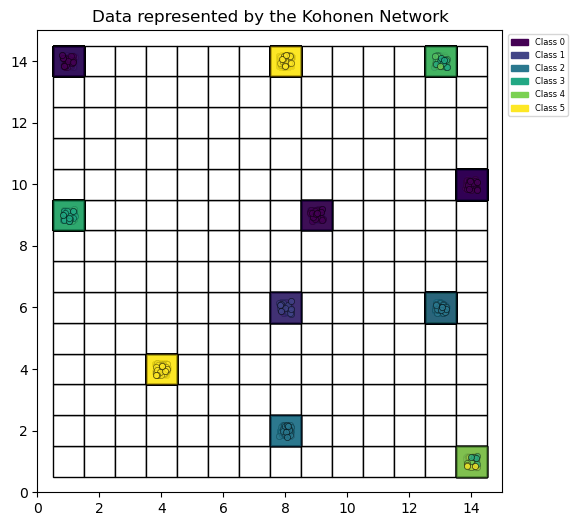

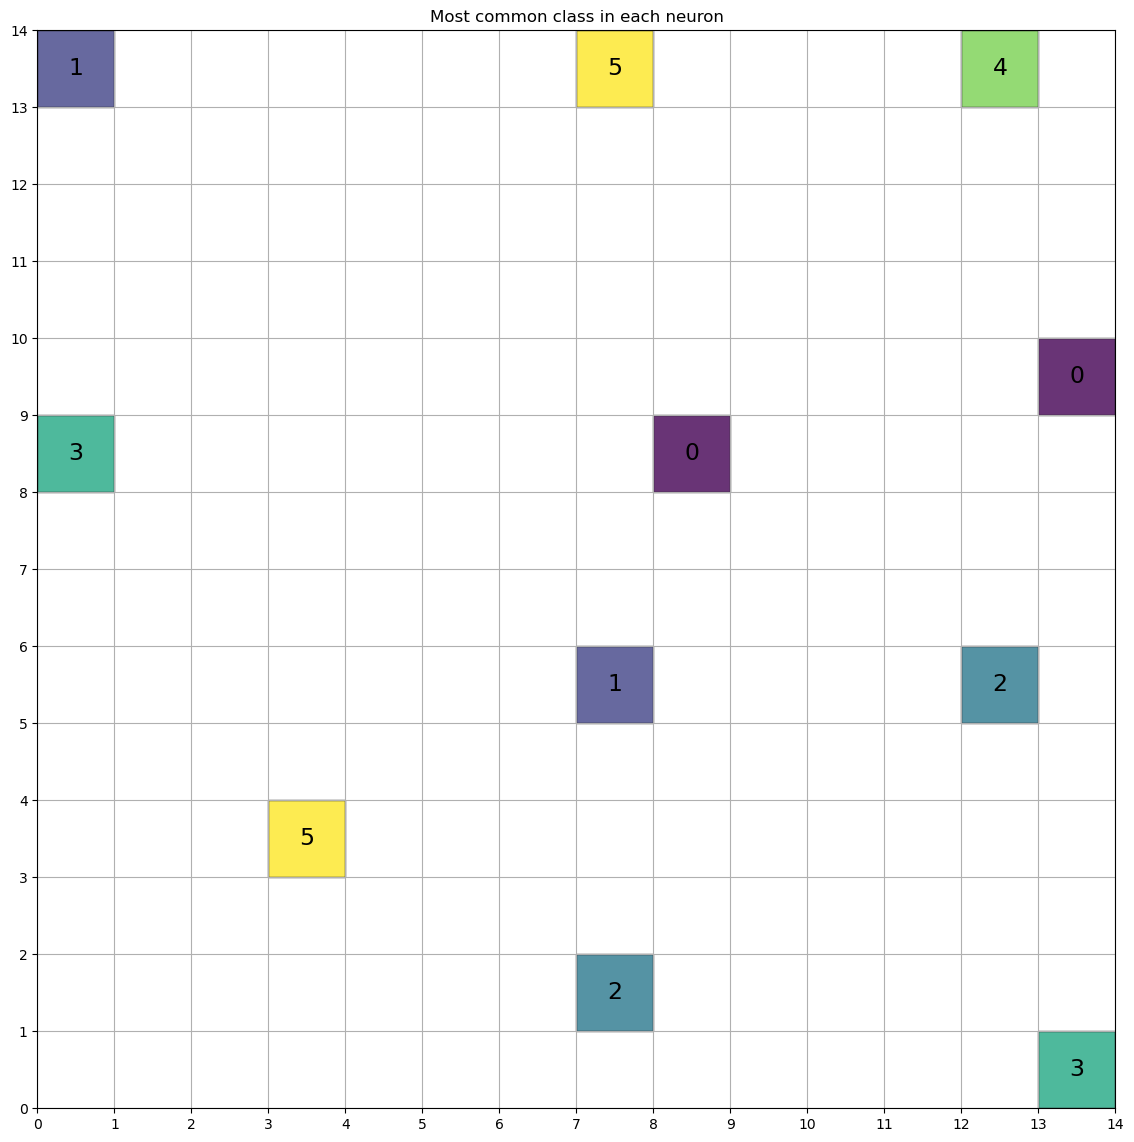

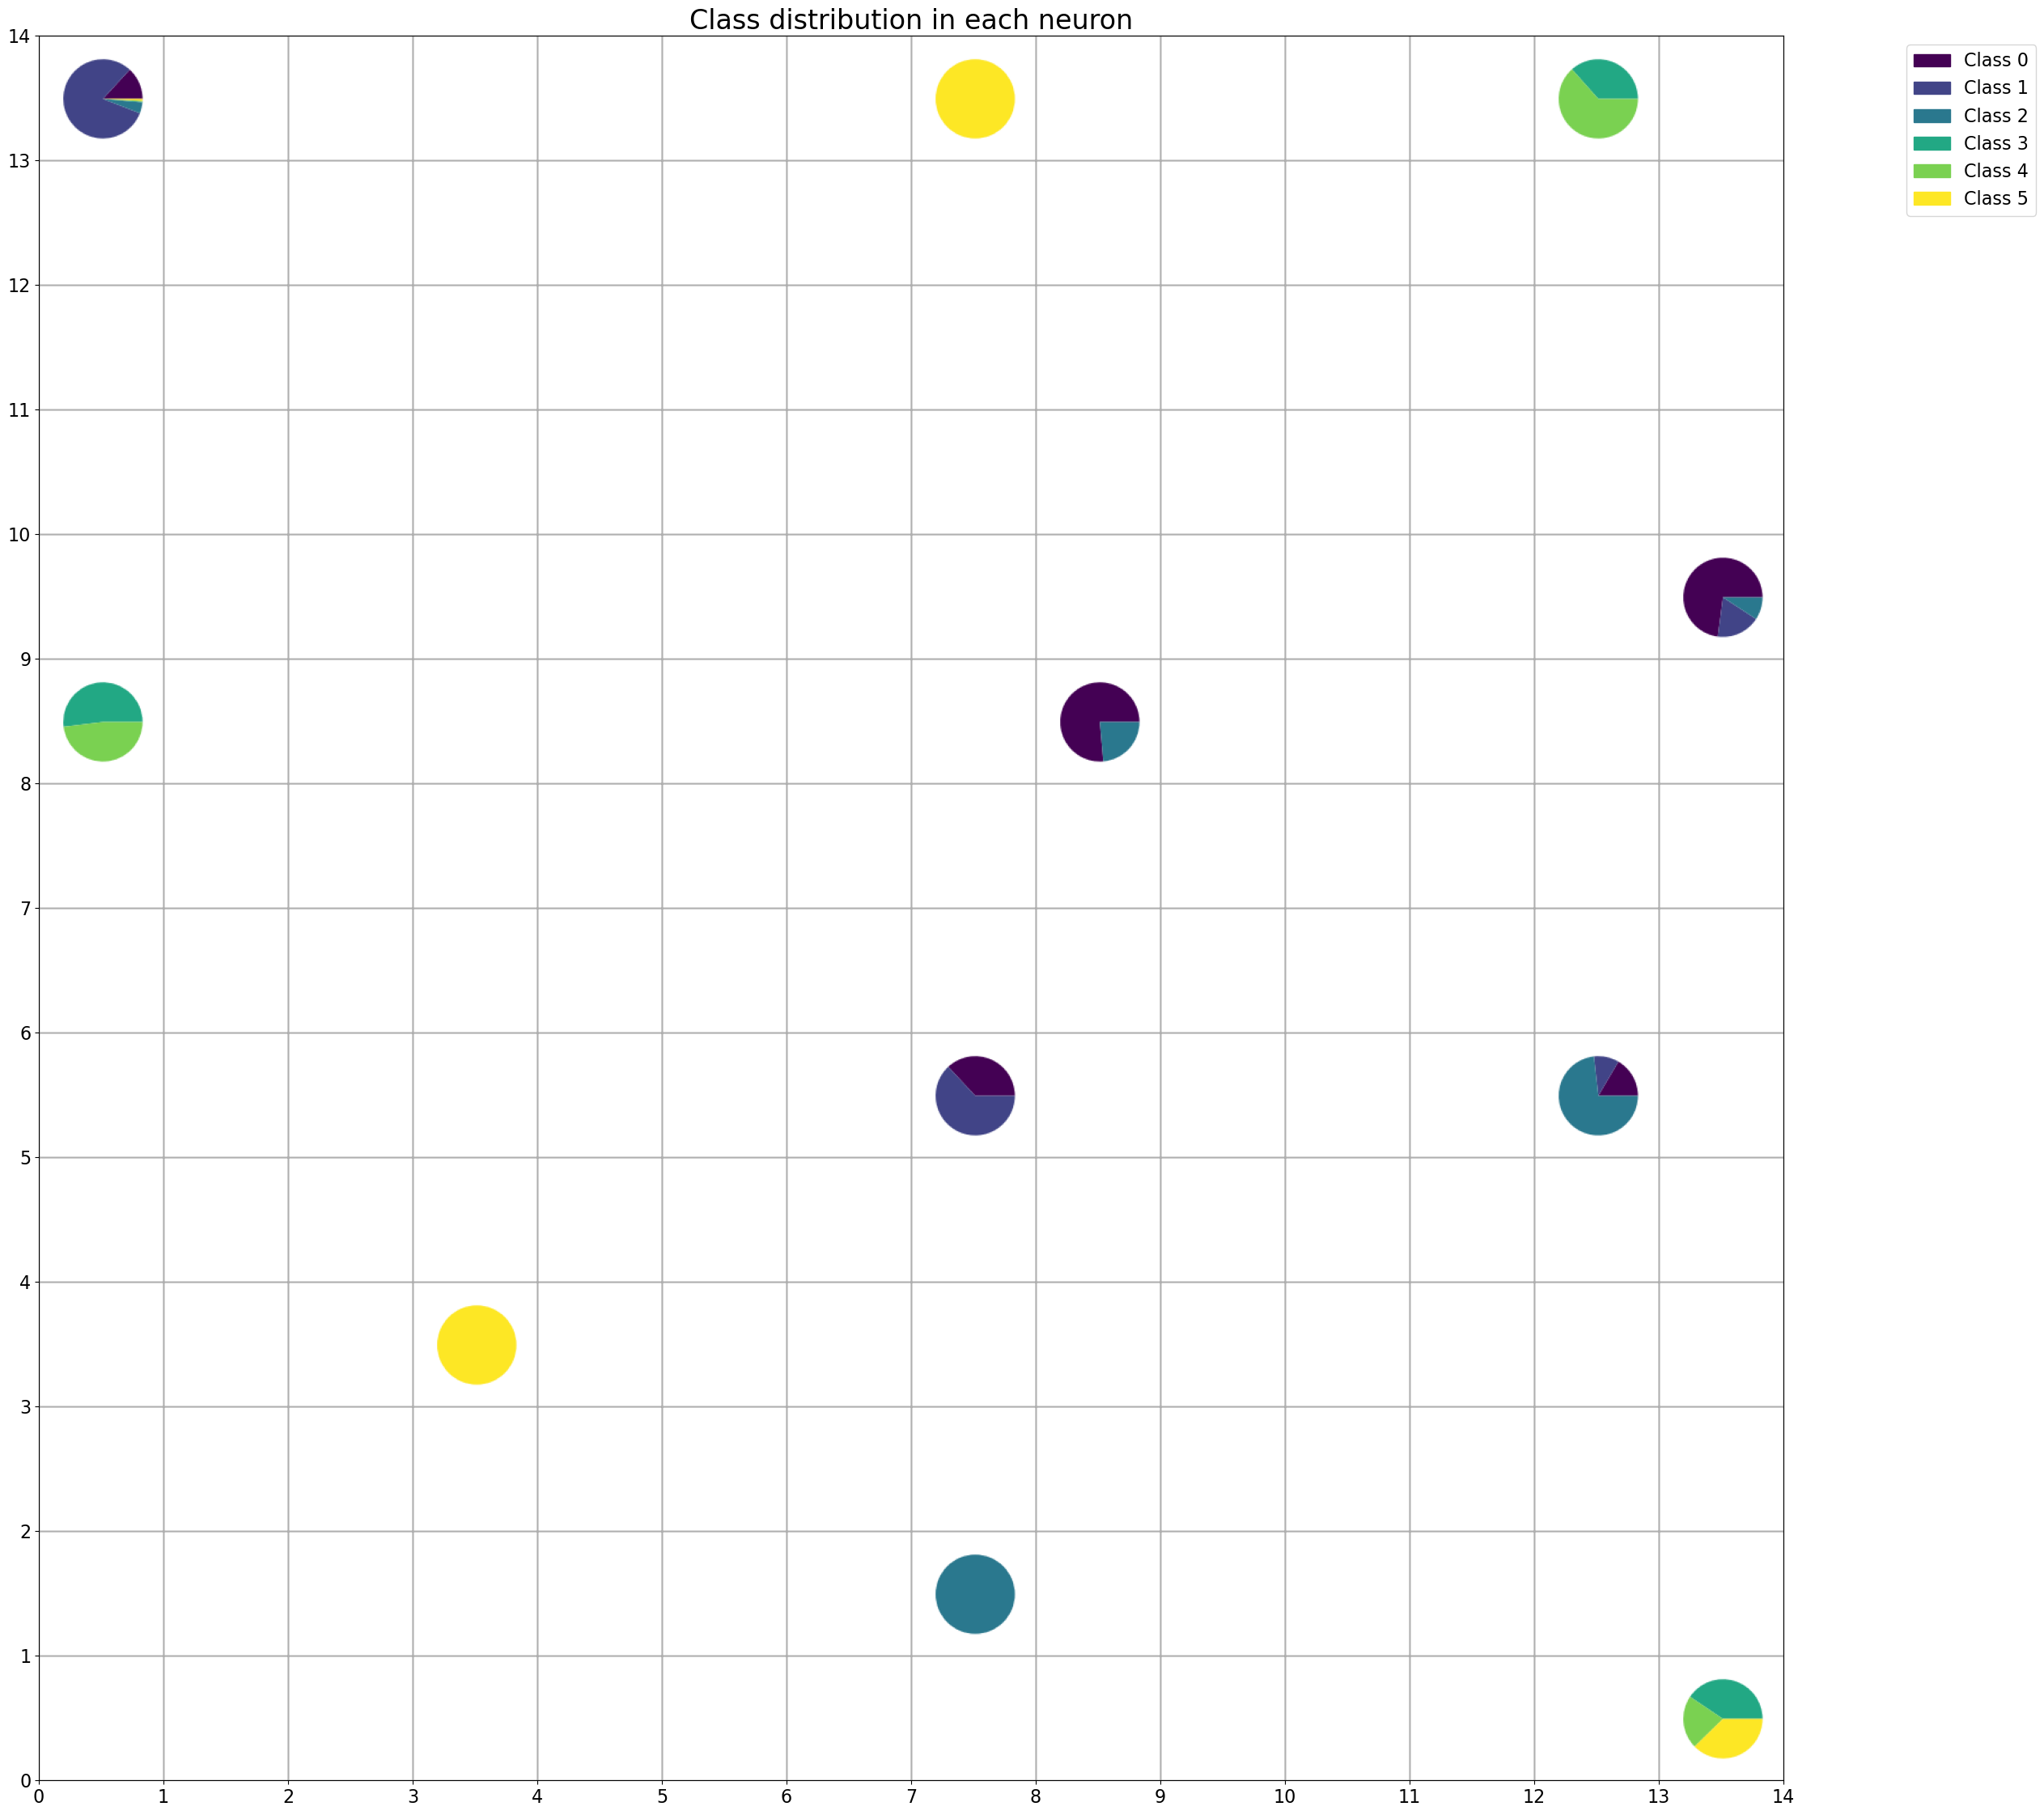

Number of neurons in the Kohonen network: 196
***
Number of classes in the data: 6
Number of classes predicted by the Kohonen network: 11
***
Silhouette score: 0.1263
Davies-Bouldin score: 2.2430


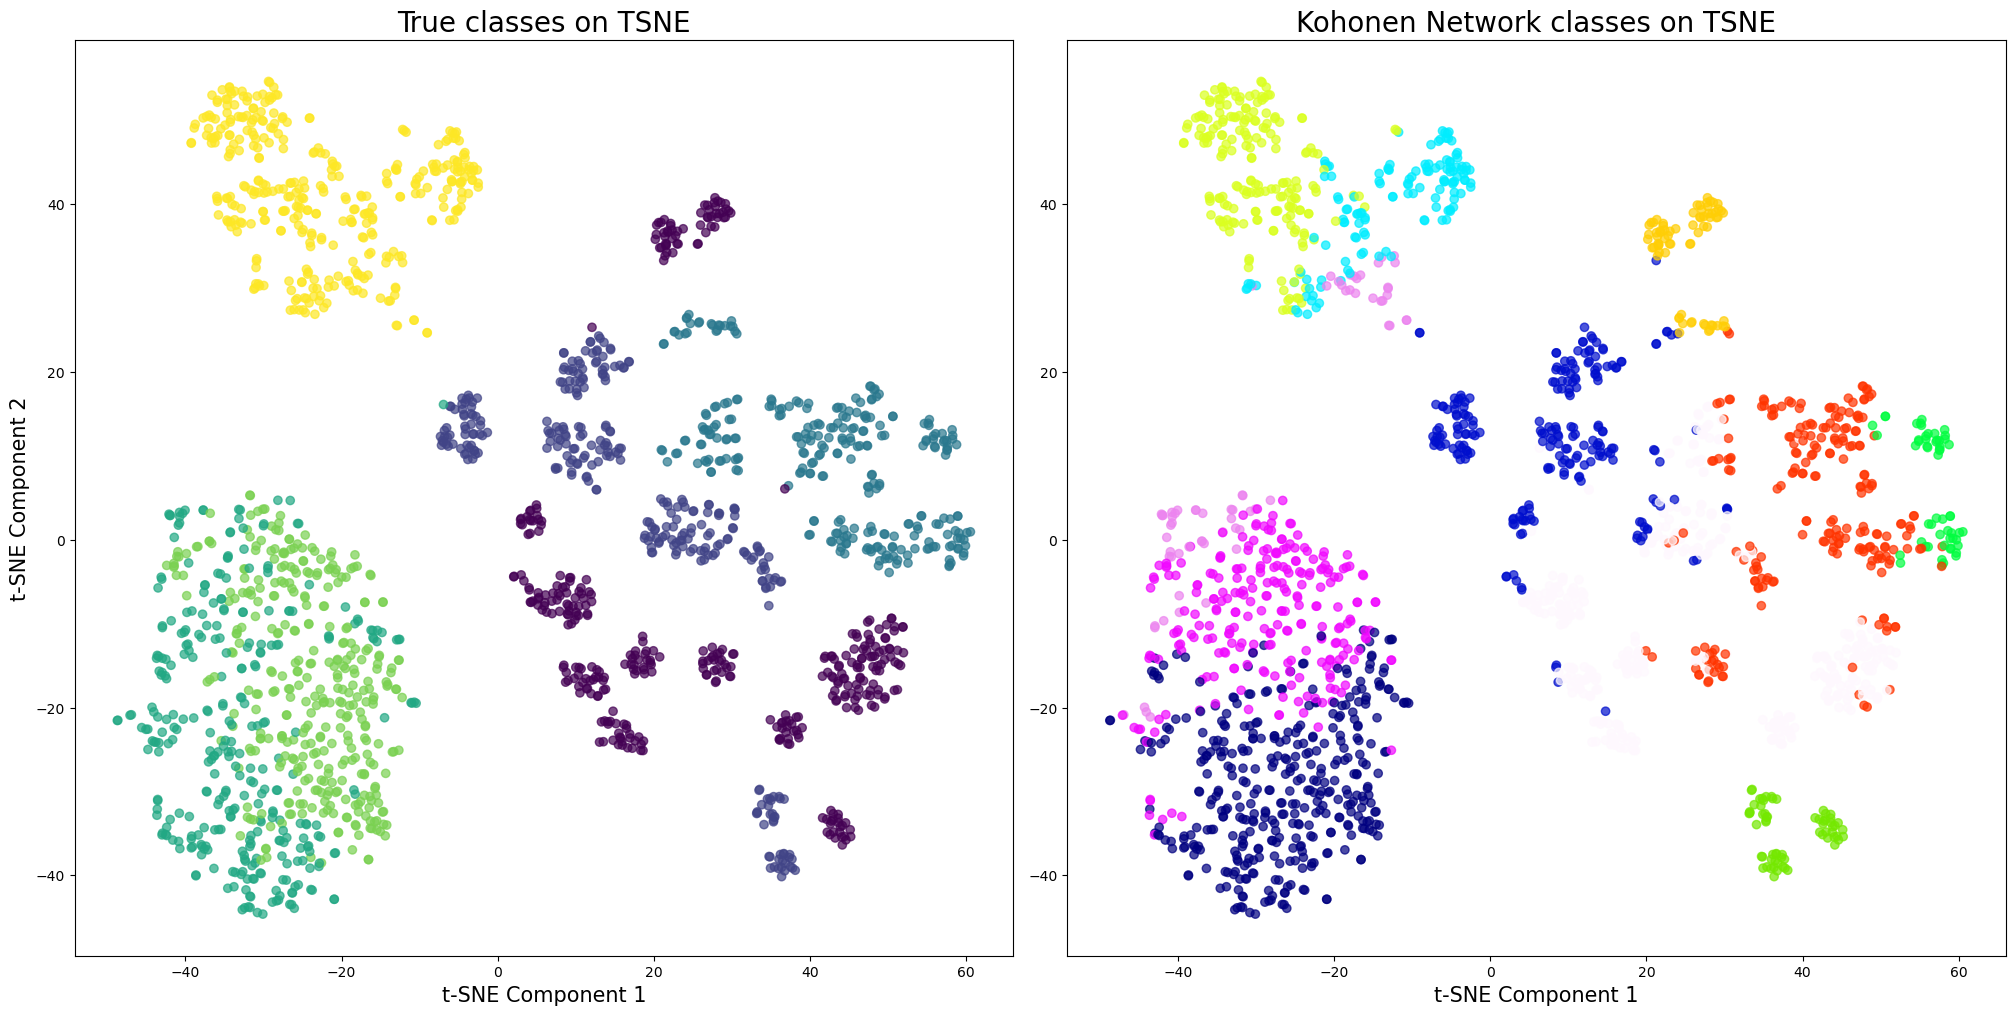

In [11]:
koh_6 = KohonenNetwork(width=14, height=14, input_dim=561, hexagonal=False, data=harus_x)
koh_6.train(data=harus_x, epochs=30, neighbourhood_scaler=1.0, learning_rate=0.1, distance = MexicanHatDistance(1.0))
koh_6.plot_map(data=harus_x, classes=harus_y)
koh_6.plot_neurons_class_labels(data=harus_x, classes=harus_y)
koh_6.plot_neurons_class_piecharts(data=harus_x, classes=harus_y)
res_6 = koh_6.metrics(data=harus_x, labels=harus_y)
plot_cluster_diffs(koh_6.predict_labels(data=harus_x), tsne_res_h, harus_y)